# Decision Tree and Ensemble Models

This notebook deals with the Decision Tree Classifier and various Ensemble Models/ Methods.
First, we want to compare the performance of a standard DecisionTreeClassifier to Ensemble Models (one example for each of the two categories Bagging and Boosting) on the preprocessed training data.
Secondly, halving grid search is used to perform hyperparameter tuning for each model with included cross-validation, different resampling methods, and furthermore, principle component analysis (PCA) is taken into account. 
Eventually, the final evaluation of the best performing classifier out of the selected Decision Tree and Ensemble Methods was supposed to be conducted by comparing the different models based on their F1 of the positive class (as it was the score which was most interesting with respect to our use case) taken as the scoring metric as part of the halving grid search (hyperparameter tuning) for all models.



The steps followed in this notebook are:

**1. Initial Exploration of Models**: Evaluated the performance of DecisionTreeClassifier and Ensemble Methods such as Bagging and Boosting (with [an] example[s] for each) on the preprocessed, random undersampled, random oversampled, oversampled smote, oversampled smote tomek training data.

**2.Hyperparameter Tuning - Each Model**: Used halving grid search with cross validaton, the different resampling methods, and PCA (data with reduced dimensionality) to find the optimal hyperparameters for each of the classifiers based on their F1 score of the positive class.
However, this was not computationally feasable for all of the classifiers like Extreme Gradient Boosting. Therefore, we agreed on optimizing just one classifier out of each category which means that we have found the optimal hyperparameters for a standard Decision Tree, a Random Forest (Bagging), and an Adaptive Boosting classifier. However, we still kept the code of the classifiers we were not able to perform hyperparameter tuning on due to computational contraints.

**3. Hyperparameter Tuning - Best Model (Excluded Due to Computational Constraints)**: Wanted to use halving grid search with cross validaton, the different resampling methods, and PCA (data with reduced dimensionality) to find the overall best model out of the selected Decision Tree and Ensemble Models with the optimal hyperparameters based on the F1 score. However, this was - again - not possible due to computational capacities, so we just compared the F1 score on the positive class of each of the classifiers with each other, after conducting half grid search for each classifier individually, as already stated in **2. Hyperparameter Tuning - Each Model**.



By the above mentioned steps, we intended to find the best performing classifier with respect to the F1 score out of the selected Decision Tree and Ensemble Models in order to compare with the other best models that resulted after hyperparamter tunining of, for instance, a Logsitic Regression classifier etc.


In [1]:
# Import libraries for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# 1. Initial Exploration of Models

## 1.1 Pre-processed Data

In [ ]:
# Make imports and preparations to load the data
import os
import sys

sys.path.append(os.path.abspath("../../scripts"))
from data_loader import DataLoader

# Load the data
data_loader = DataLoader()
X_train, y_train = data_loader.training_data
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

### 1.1.1 Decision Tree

In [3]:
# Imports for the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree model with default parameters
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the preprocessed training data
decision_tree.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = decision_tree.predict(X_train)

# Evaluate the model's performance on the training dataset
accuracy_train = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = decision_tree.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train)
print("Classification Report:\n", report)

Training Accuracy 0.9829143577960986
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8723    0.8666    0.8694     21797
         1.0     0.3111    0.3220    0.3164      4078

    accuracy                         0.7808     25875
   macro avg     0.5917    0.5943    0.5929     25875
weighted avg     0.7839    0.7808    0.7823     25875



It is visible that by training a standard decision tree with the preprocesed data overfitting occurs which is indicated by the training accuracy being almost 100% and the accuracy on the preprocessed validation dataset being only 78%. 
Furthermore, we have very low values for the recall on the positive class and also the F1 score on the positive class which is what we focus on with respect to our use case.

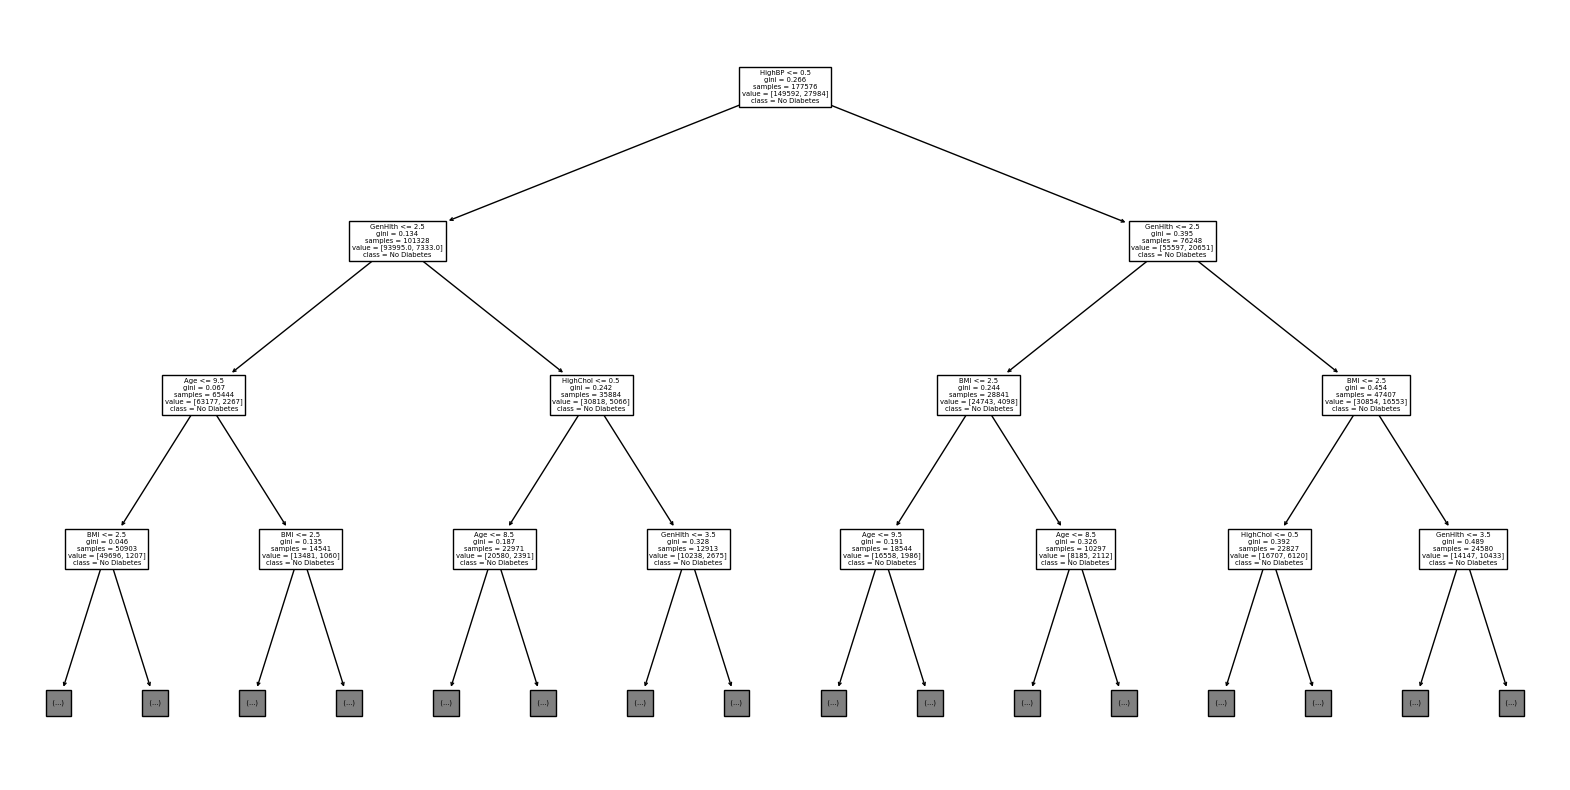

In [4]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    decision_tree,
    feature_names=X_train.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

At the top of the standard decision tree, as the root node, appears the featuer high blood pressure which makes it the most important feature or rather the feature that splits the data most purely with a gini index of 0.266. In total 177,576 were considered for the split. 149,592 samples belonged to the class of 'No Diabetes' and 27,984 samples fell into the class of 'Diabetes'. However, as more samples belonged to the class of 'No Diabetes', this is the predicted class at the root node here. With respect to moving further down in the decison tree, one would need to take into account if 'High BP' is above 0,5 or below or equal to 0,5. If the first is the case, then one would move down taking the the branch to the right of 'High BP', otherwise one would move down taking the left branch. In both cases one would arrive at the feature 'GenHlth' and look if it is <= 2,5, however, the number of total samples taken into account at the two nodes differs and also the the featues in the lower layers are not the same anymore. However, in general, the higher the features in the layers, the more important they are with respect to making a decision, or rather prediction, on the class of the target variable (meaning 'No Diabetes' or 'Diabetes').

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/dt_model_preprocessed{timestamp}.pkl'
joblib.dump(decision_tree, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/dt_model_preprocessed20241206_232313.pkl'


### 1.1.2 Bagging (Example: Random Forest Classifier)

In [5]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the random forest ensemble model with default parameters
bagging_random_forest = RandomForestClassifier(random_state=42)

# Train the model on the preprocessed training data
bagging_random_forest.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = bagging_random_forest.predict(X_train)

# Evaluate the model's performance on the training dataset
accuracy_train = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = bagging_random_forest.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train)
print("Classification Report:\n", report)

Training Accuracy 0.9828974636212101
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8667    0.9547    0.9086     21797
         1.0     0.4702    0.2151    0.2951      4078

    accuracy                         0.8381     25875
   macro avg     0.6685    0.5849    0.6018     25875
weighted avg     0.8042    0.8381    0.8119     25875



Again, overfitting seems to be an issue here when comparing the training accuracy to the validation accuracy. However, the the two are moving closer to each other. Meaning, we improve the accuracy on the validation dataset, making the random forest ensemble model the best model so far with respect to accuracy.
However, the recall went down by almost 10 percentage points and also the F1 score on which we focus decreased.


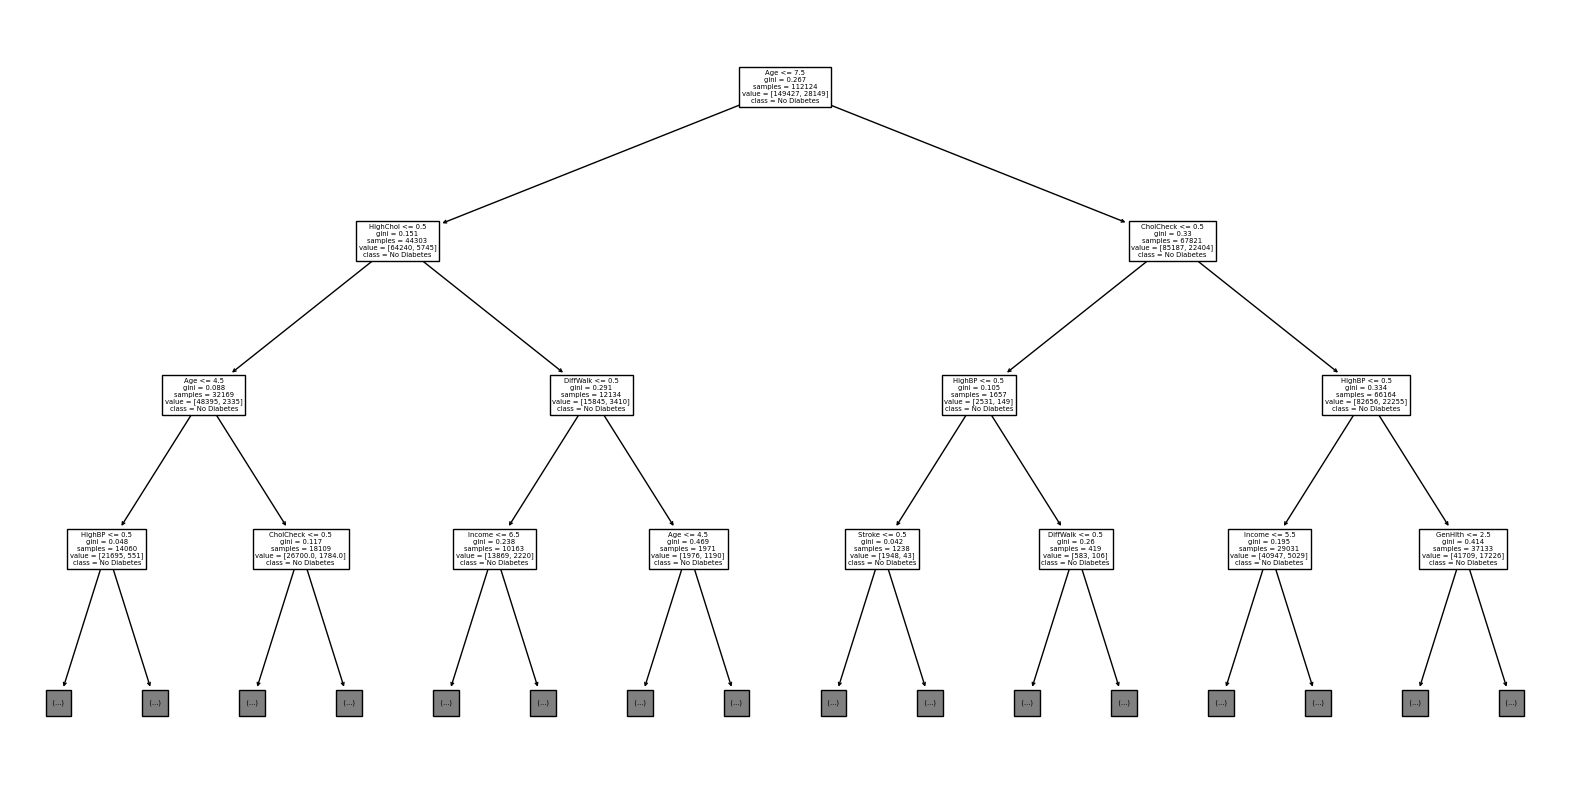

In [6]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest.estimators_[0],  
    feature_names=X_train.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()


In contrast to the standard decision tree, we can see 'Age' above as the most important feature for one of the selected decision trees out of the random forest. The second most important features are either high cholesterol or the cholesterol check. For high cholesterol the features one layer down are, again, age and difficulty walking. Whereas, below cholesterol check we find high blood pressure on the second layer which was previously the most important feature in the standard decision tree. In the last/third layer high blood pressure, cholesterol check, income, age, stroke, difficulty walking and general health appear. 

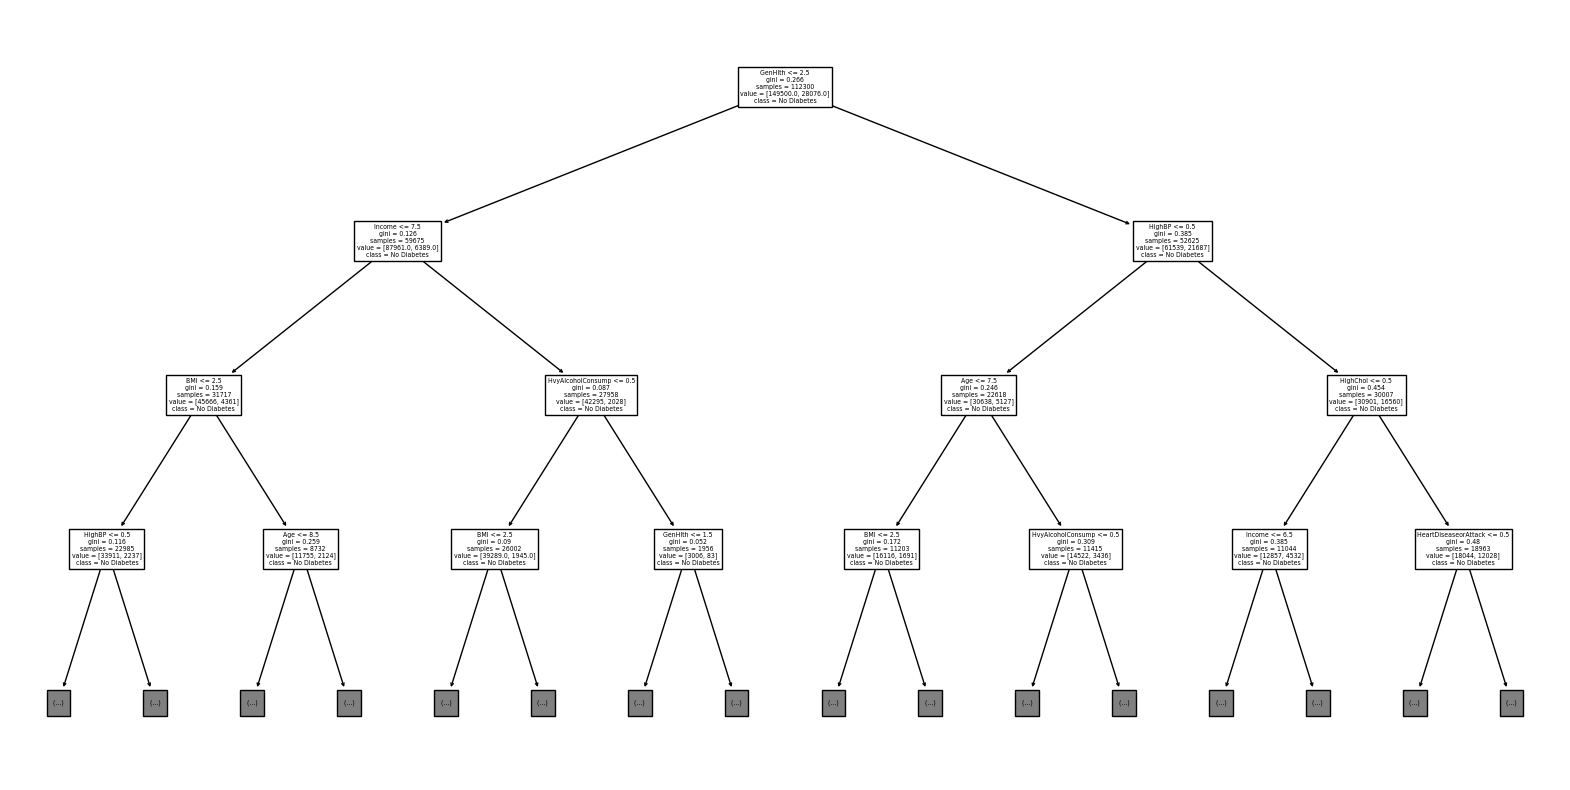

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the second tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest.estimators_[1],  
    feature_names=X_train.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

The second tree of the random forest can be seen above. The tree is different from the first tree, which makes sense due to the fact that the multiple decision trees in the random forest consider a different subset of the features and data. This is supposed to lead to make better generalized predicitions/ predictions on unseen data and, therefore, aid with overfitting. 

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/brf_model_preprocessed{timestamp}.pkl'
joblib.dump(bagging_random_forest, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/brf_model_initial20241130_183428.pkl'


### 1.1.3.Boosting

#### 1.1.3.1 Example 1: Adaptive Boosting

In [24]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
adaptive_boosting = AdaBoostClassifier(random_state=42)

# Train the model on the preprocessed training data
adaptive_boosting.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = adaptive_boosting.predict(X_train)

# Evaluate the model's performance on the training dataset
accuracy_train = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = adaptive_boosting.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train)
print("Classification Report:\n", report)

Training Accuracy 0.848020002703068
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8674    0.9672    0.9146     21797
         1.0     0.5442    0.2097    0.3027      4078

    accuracy                         0.8478     25875
   macro avg     0.7058    0.5884    0.6086     25875
weighted avg     0.8165    0.8478    0.8181     25875



Here we can observe that we are not overfitting anymore for the first time with respect to the preprocessed data.
However, the recall on the postitive class went down by ca. 1% which is also the percentage the F1 score on the positive class increased which is beneficial regarding our use case in the medical context.

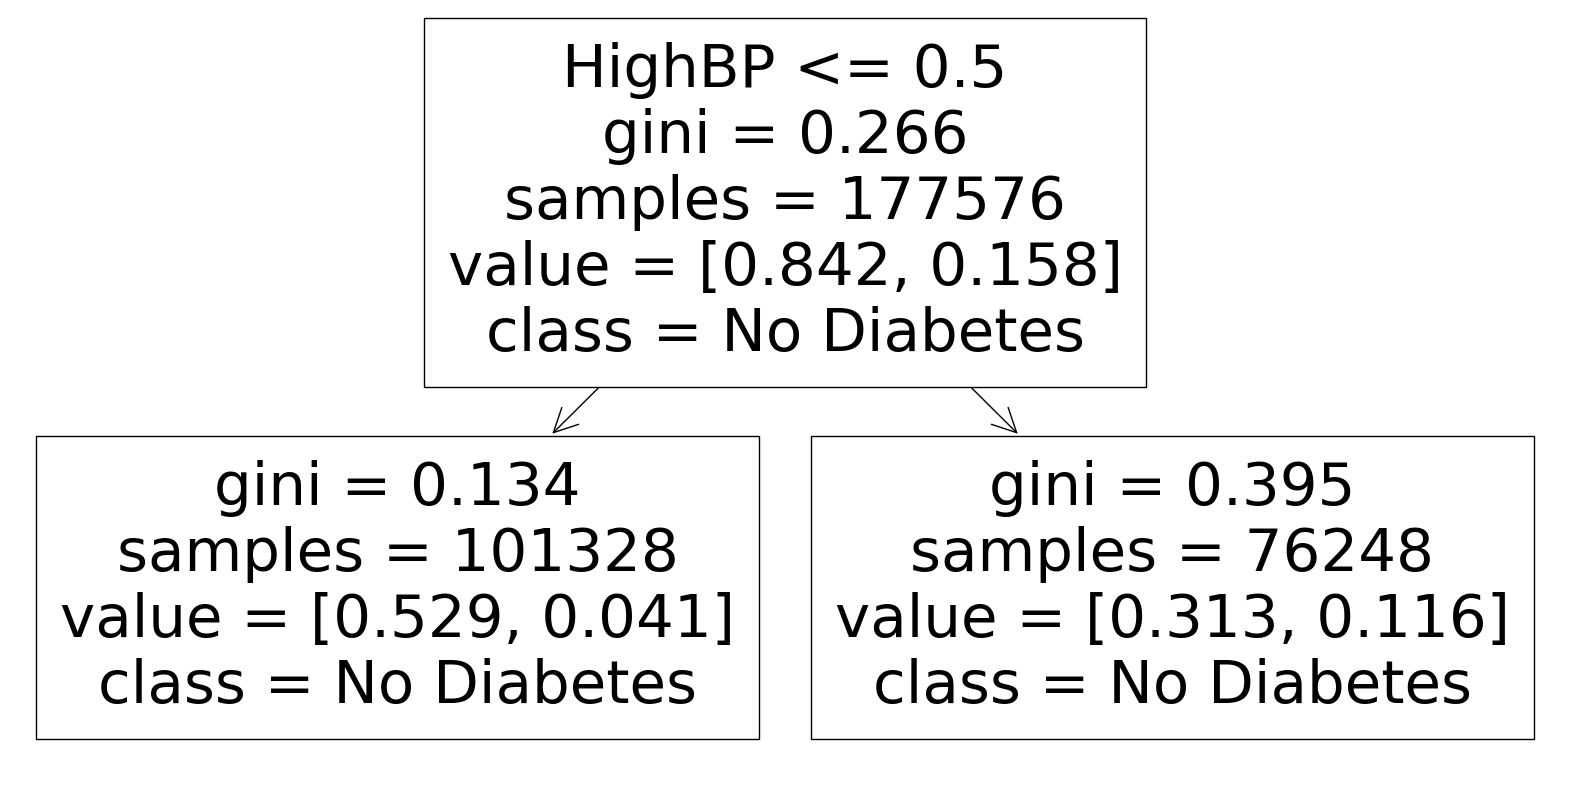

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs, which is also called a "decision stump")
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting.estimators_[0],  
    feature_names=X_train.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

The feature high blood pressure is the only one displayed as part of the decision stump, making it the most important feature with respect to the adaptive boosting model on the preprocessed data, which is the same as for the standard decision tree on the preprocessed data because this is the feature that splits the preprocessed data most purely.

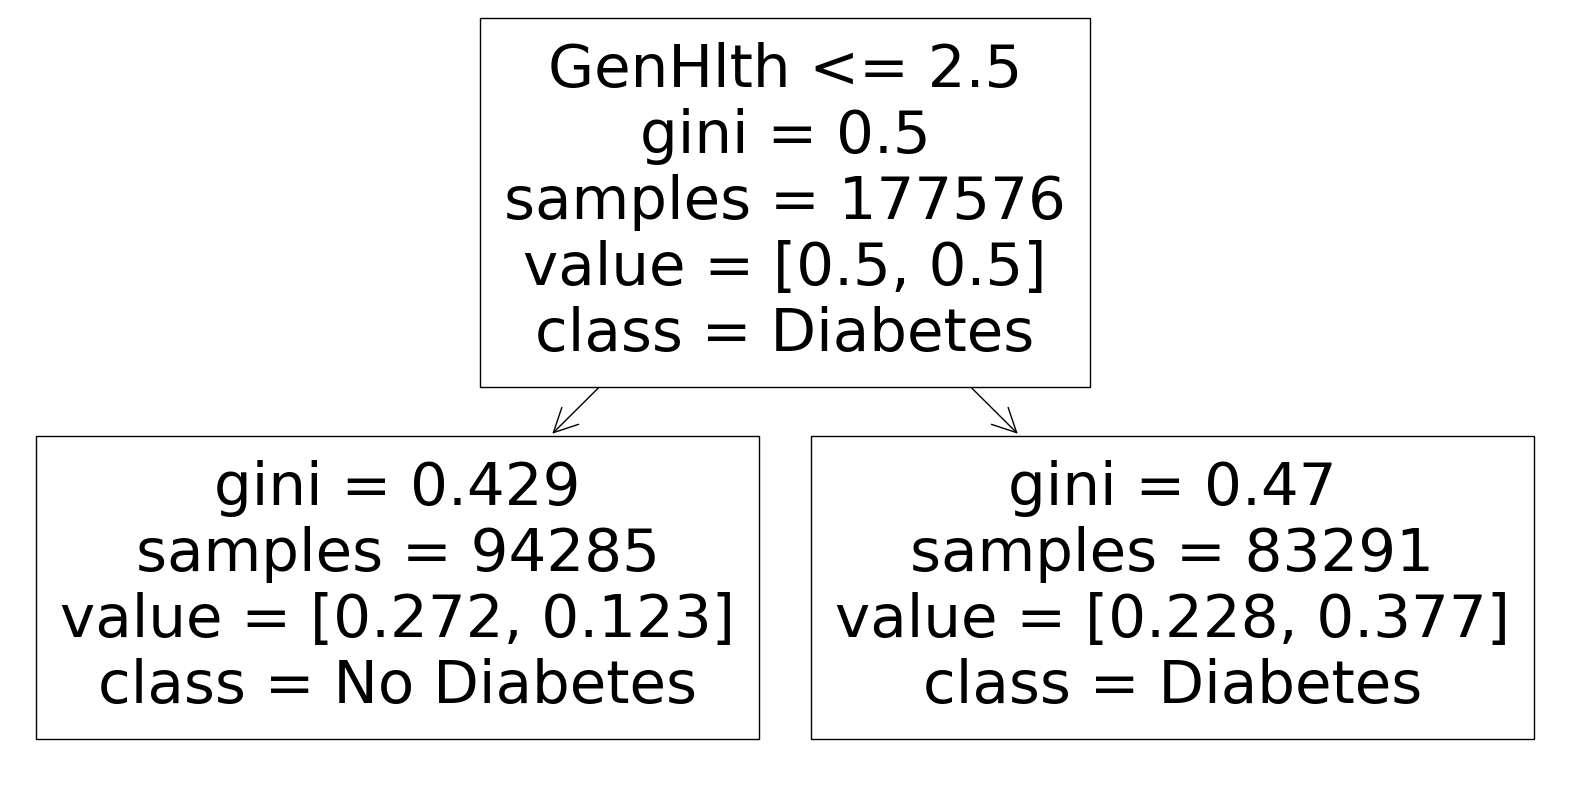

In [26]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the second tree of the model (with this model only one split and layer occurs, which is also called a "decision stump")
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting.estimators_[1],  
    feature_names=X_train.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

The second decision stump revealed on the preprocessed data would also be in the layer below the root node of the standard decision tree of the preprocessed data as this is the feature that splits the preprocessed data again most purely or rather second purely after having conducted the first split with the feature high blood pressure which splits the preprocessed data most purely and is, therefore, the most important feature w.r.t the preprocessed data followed by general health, as you can see above.

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/adab_model_preprocessed{timestamp}.pkl'
joblib.dump(adaptive_boosting, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/adab_model_initial20241130_183430.pkl'


#### 1.1.3.2 Example 2: Extreme Gradient Boosting


In [9]:
from xgboost import XGBClassifier

# Initialize the XGBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
extreme_gradient_boosting = XGBClassifier(random_state=42)

# Train the model on the preprocessed training data
extreme_gradient_boosting.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = extreme_gradient_boosting.predict(X_train)

# Evaluate the model's performance on the training dataset
accuracy_train = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = extreme_gradient_boosting.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train)
print("Classification Report:\n", report)

Training Accuracy 0.8608595756183268
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8663    0.9696    0.9151     21797
         1.0     0.5520    0.2003    0.2940      4078

    accuracy                         0.8483     25875
   macro avg     0.7092    0.5850    0.6045     25875
weighted avg     0.8168    0.8483    0.8172     25875



Here were are slightly more than for the AdaBoost model but almost not overfitting with the XGBoost model on the preprocessed data. 
However, the F1 score on the positive class slightly went down, same as for the recall on the positive class.

<Figure size 30000x15000 with 0 Axes>

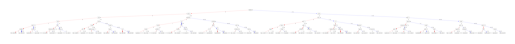

In [10]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
import xgboost as xgb


# Visualize the first tree of the model
plt.figure(figsize=(300, 150))  
plot_tree(extreme_gradient_boosting)
plt.show()

Unfortunately, there is no optimal way to display the tree of the XGBoost model on the preprocessed data, even if we adjust scaling.

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/xgb_model_preprocessed{timestamp}.pkl'
joblib.dump(extreme_gradient_boosting, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/xgb_model_initial20241130_183432.pkl'


## 1.2 Random Undersampling

In [11]:
# test random undersampling
X_train_undersampling_random, y_train_undersampling_random = data_loader.training_data_undersampling_random
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train_undersampling_random shape: {X_train_undersampling_random.shape}")
print(f"y_train_undersampling_random shape: {y_train_undersampling_random.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_undersampling_random shape: (55968, 21)
y_train_undersampling_random shape: (55968,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)


### 1.2.1 Decision Tree

In [12]:
# Imports for the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree model with default parameters
decision_tree_undersampling_random = DecisionTreeClassifier(random_state=42)

# Train the model on the preprocessed training data
decision_tree_undersampling_random.fit(X_train_undersampling_random, y_train_undersampling_random)

# Make predictions on the training set
y_train_pred_undersampling_random = decision_tree_undersampling_random.predict(X_train_undersampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_undersampling_random = accuracy_score(y_train_undersampling_random, y_train_pred_undersampling_random)

# Make predictions on the validation set
y_val_pred = decision_tree_undersampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_undersampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.9813464837049742
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9065    0.6665    0.7682     21797
         1.0     0.2619    0.6327    0.3705      4078

    accuracy                         0.6611     25875
   macro avg     0.5842    0.6496    0.5693     25875
weighted avg     0.8049    0.6611    0.7055     25875



With respect to the standard decision tree on random undersampling, we are again highly overfitting. 
Nevertheless, our recall on the positive class highly increased. Also, the F1 score on the positive class went not as much up as the recall on the positive class but it still elevated by almost 10% compared to the XGBoost model on random oversampling.

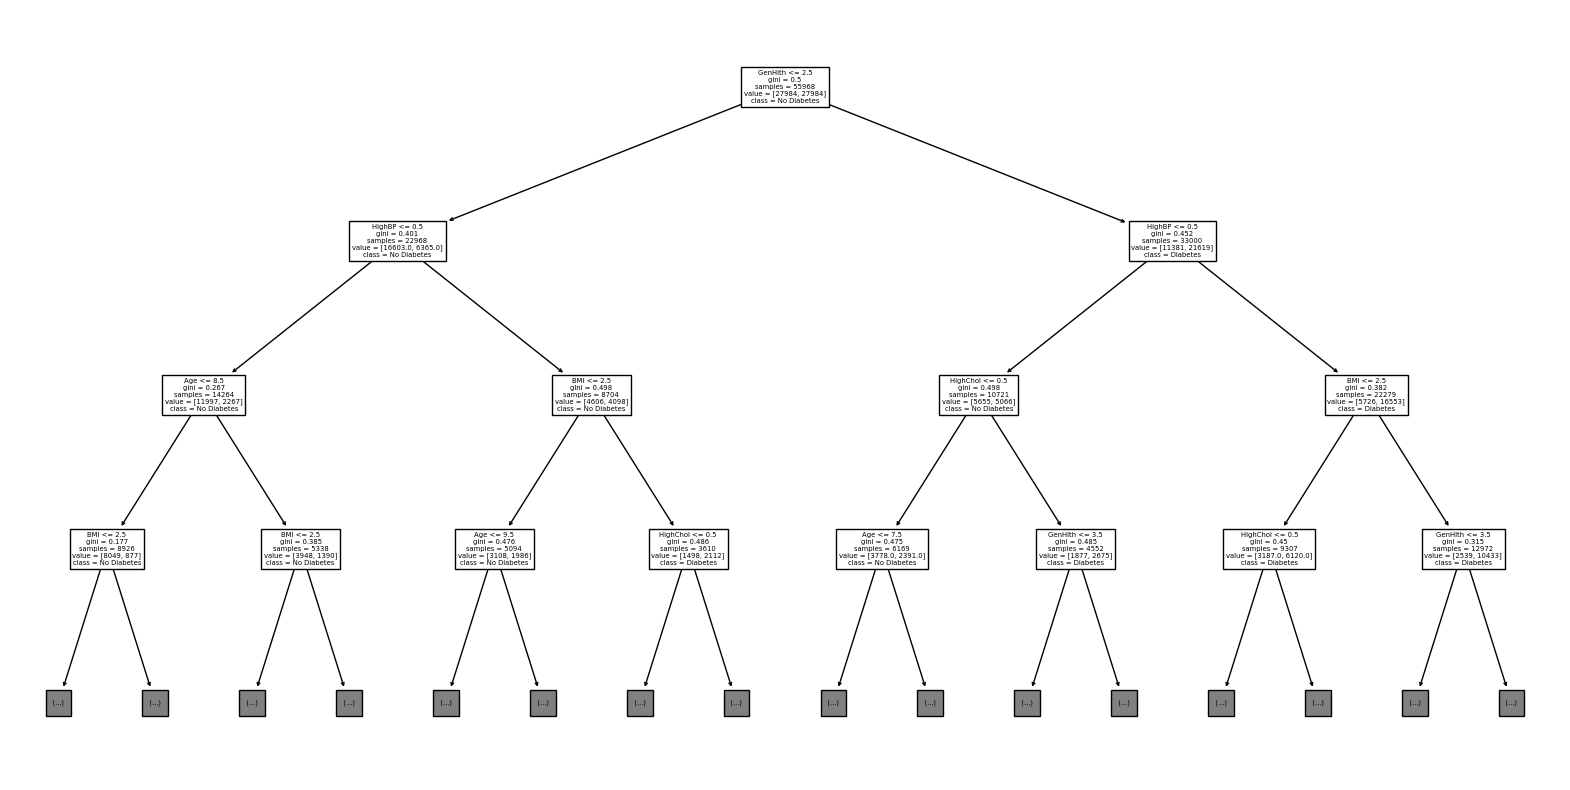

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    decision_tree_undersampling_random,
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In the decision tree for random undersampling, high blood pressure does not appear as the root node anymore but it is one layer down no matter if one takes the left or the right branch down. One more layer down: age, BMI, high cholesterol and again BMI appear. 
In the last layer displayed, the features BMI, age, high cholesterol and general health are visible, all of them twice.

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/dt_model_undersampling_random{timestamp}.pkl'
joblib.dump(decision_tree_undersampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/dt_model_undersampling_random20241130_183433.pkl'


### 1.2.2 Bagging (Example: Random Forest)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the random forest ensemble model with default parameters
bagging_random_forest_undersampling_random = RandomForestClassifier(random_state=42)

# Train the model on the preprocessed training data
bagging_random_forest_undersampling_random.fit(X_train_undersampling_random, y_train_pred_undersampling_random)

# Make predictions on the training set
y_train_pred_undersampling_random = bagging_random_forest_undersampling_random.predict(X_train_undersampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_undersampling_random = accuracy_score(y_train_pred_undersampling_random, y_train_pred_undersampling_random)

# Make predictions on the validation set
y_val_pred = bagging_random_forest_undersampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_undersampling_random)
print("Classification Report:\n", report)

Training Accuracy 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9360    0.7001    0.8010     21797
         1.0     0.3170    0.7440    0.4445      4078

    accuracy                         0.7070     25875
   macro avg     0.6265    0.7220    0.6228     25875
weighted avg     0.8384    0.7070    0.7448     25875



With a random forest on random undersampled data the recall on the positive class is so far the highest and also the F1 score on the positive class reached a peak. However, we are again highly overfitting in this case.

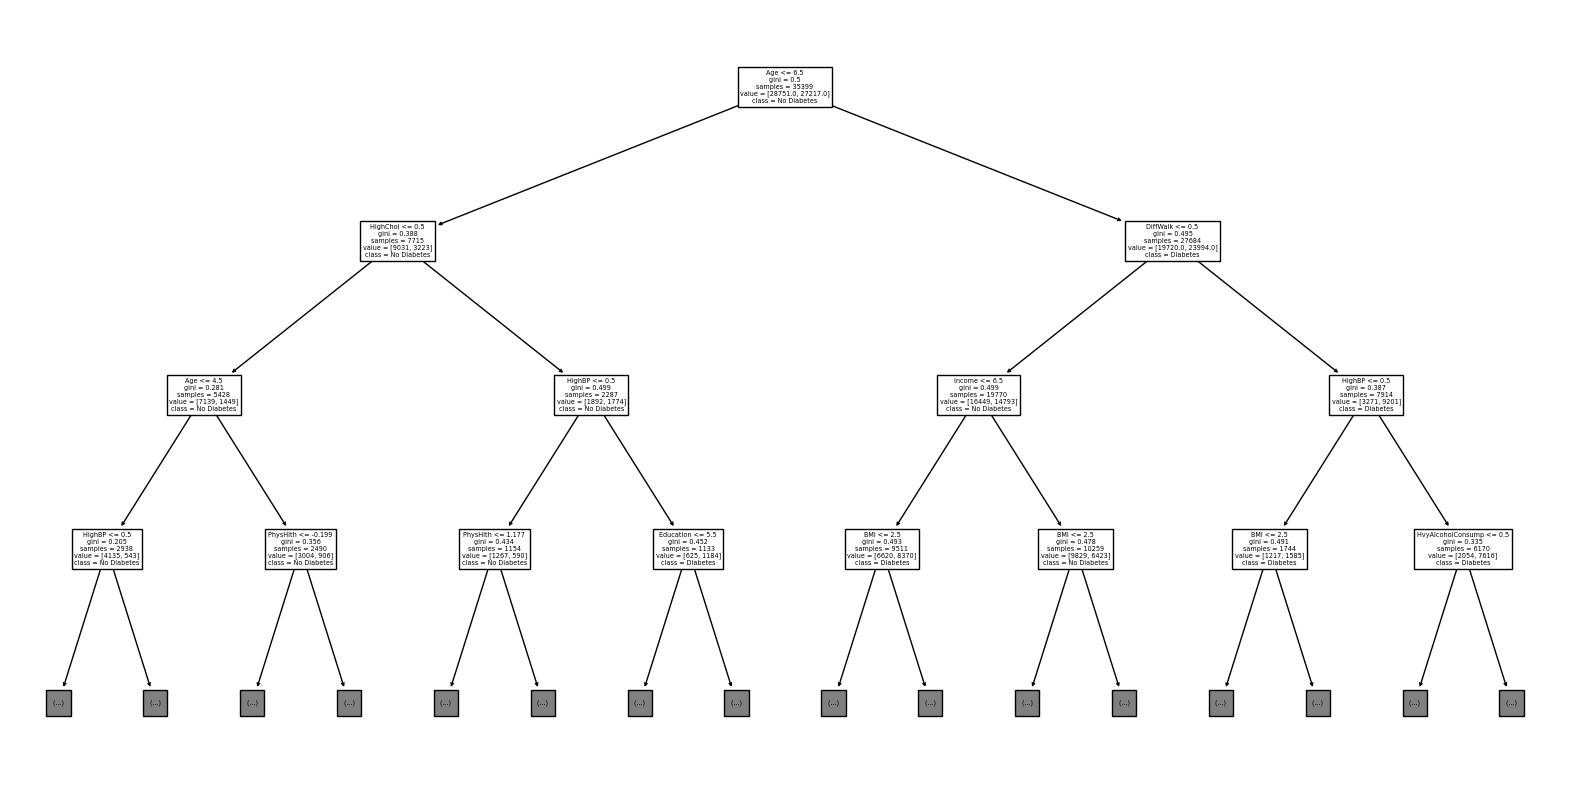

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs, which is called decision stump)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest_undersampling_random.estimators_[0],  
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

Like already with one of the decision trees out of the random forest on preprocessed data, also for one of the decision trees out of the random forest on random undersampled data age is again the most imporant feature. One layer down the feature for the left branch stays the same with high cholesterol. However, the feature on the right is now difficulty walking instead of cholesterol check. However, difficulty walking was previously just one layer down, meaning still also very important. Instead of income and stroke in the last layer to appear, we can see here physical health, education, and heavy alcohol consumption. The switch in features is no issue as with random forest a subset  of features is considered at each node, meaning if the most important features are not in the subset, features from the rather lower layers before, are now on top. Furthermore, this differs for each of the decision trees in a random forest, however, we only display one out of the multiple decision trees at a time. 


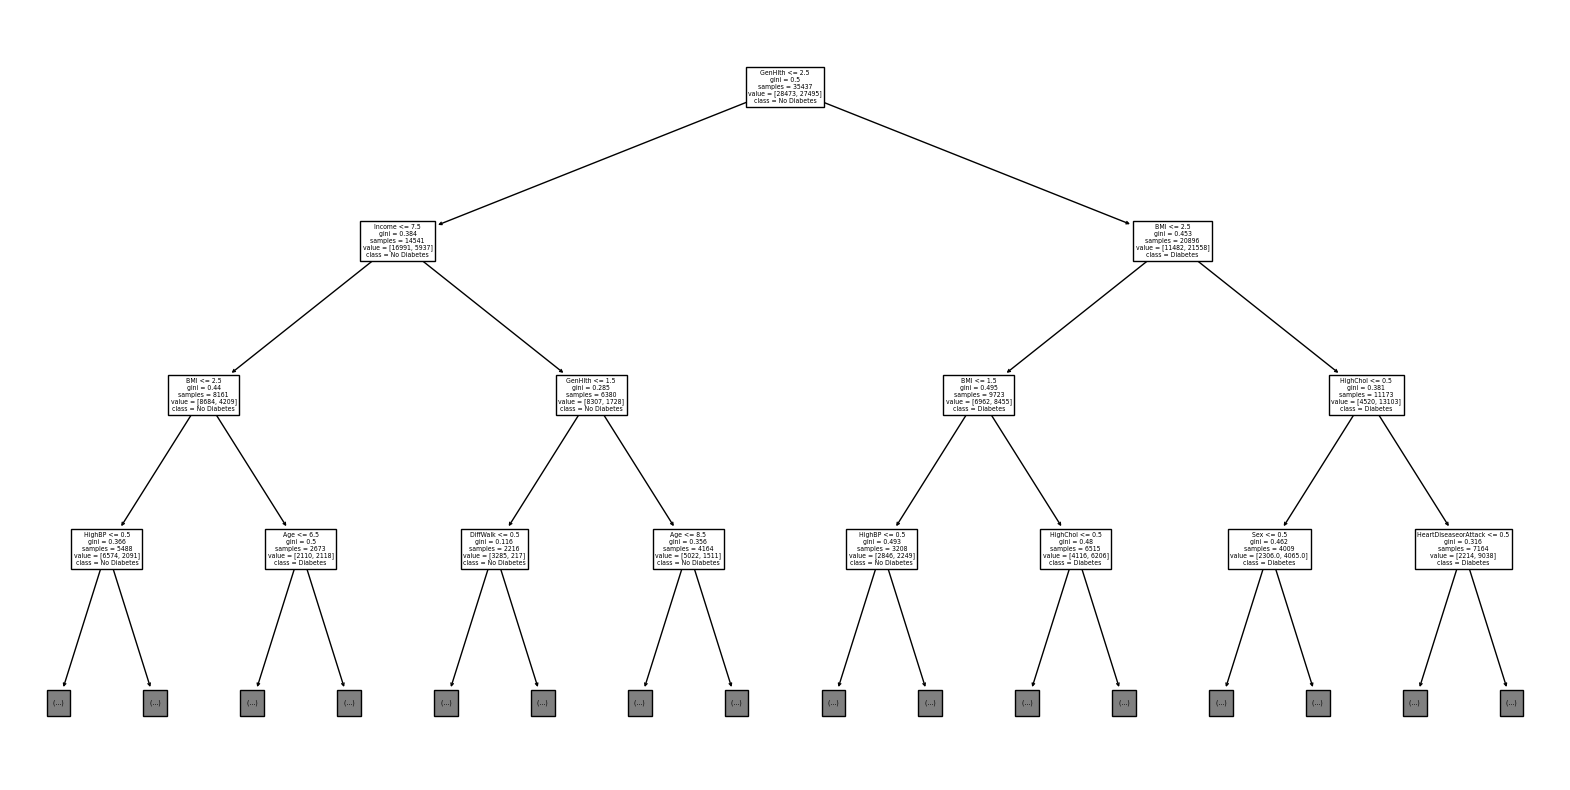

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs, which is called decision stump)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest_undersampling_random.estimators_[1],  
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

Another decision tree selected out of the random forest on the random undersampled data (displayed above) looks again differently, starting from the root node. Here, general health is the most important feature. However, when taking a look at the other features in the lower layers, they look familiar as they have already appeared in the upper layers of some of the other decision trees before, which makes sense, since they are part of the most important features.
General health also was the root node of the second displayed decision tree of the random forest on preprocessed data. However, the gini was lower before with 0.266 instead of 0.5 which meant that before a more pure split was possible. Furthermore, the sample size which is considered for the split is lower here which makes sense, as we have randomly undersampled the data. Income still appears going one layer down by the left branch. However, instead of high blood pressure, now, BMI appears on the right. Moreover, the feature heavy alcohol consumption still appears but rather in the last displayed layer. Whereas, it was already one layer up in the second decision tree of the random forst on preprocessed data and again twice in the last displayed layer. 
Here, additionally, the features sex and difficulty walking appear, which was not part of the first three layer of the second tree displayed out of the random forest on the preprocessed data.

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/brf_model_undersampling_random{timestamp}.pkl'
joblib.dump(bagging_random_forest_undersampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/brf_model_undersampling_random20241130_183446.pkl'


### 1.2.3 Boosting

#### 1.2.3.1 Example 1: Adaptive Boosting

In [18]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
adaptive_boosting_undersampling_random = AdaBoostClassifier(random_state=42)

# Train the model on the preprocessed training data
adaptive_boosting_undersampling_random.fit(X_train_undersampling_random, y_train_undersampling_random)

# Make predictions on the training set
y_train_pred_undersampling_random = adaptive_boosting_undersampling_random.predict(X_train_undersampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_undersampling_random = accuracy_score(y_train_undersampling_random, y_train_pred_undersampling_random)

# Make predictions on the validation set
y_val_pred = adaptive_boosting_undersampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_undersampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.744550457404231
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9420    0.7164    0.8138     21797
         1.0     0.3351    0.7641    0.4659      4078

    accuracy                         0.7239     25875
   macro avg     0.6385    0.7402    0.6399     25875
weighted avg     0.8463    0.7239    0.7590     25875



With adaptive boosting on random undersampled data, we are able to achive an even a bit higher recall as well as F1 score on the positive class. Furthermore, we are only slightly overfitting which is a huge progress. 

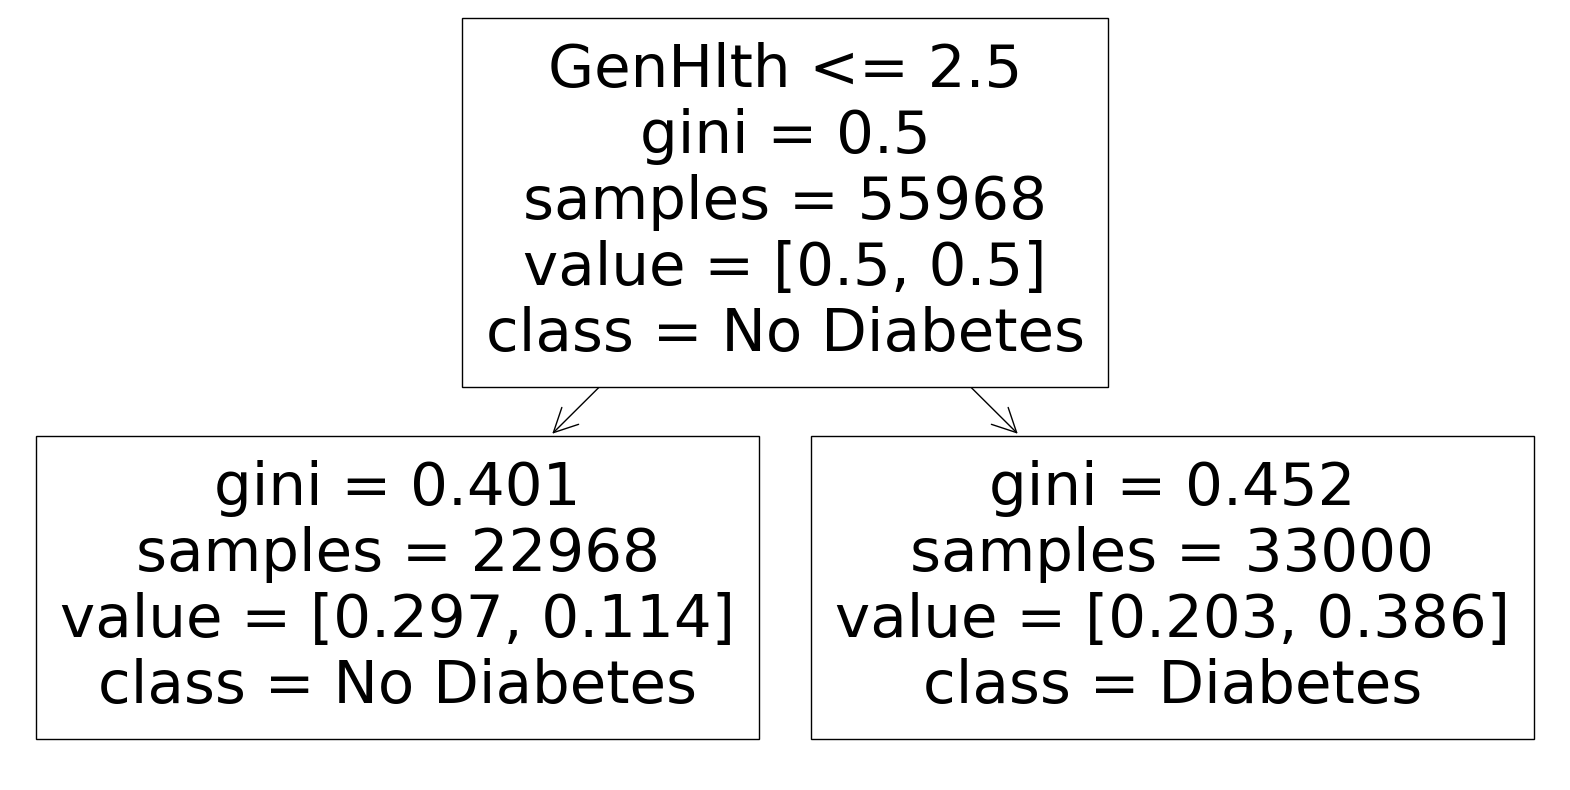

In [19]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs, which is called a decision stump)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting_undersampling_random.estimators_[0],  
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

It is interesting to see that the first decision stump out of the adaptive boosting ensemble model on random undersampled data is about the feature general health that occured as the second decision stump of the adaptive boosting ensemble model on preprocessed data and, actually, vice versa (as one can see with taking the second decsion stump below also into consideration). Meaning, the feature high blood pressure of the second decision stump for the adaptive boosting ensemble model on random undersampled data (which can be seen here below) is the first decision stump for the adaptive boosting ensemble model on preprocessed data.

So, on the different data, the order of feature importance, meaning which feature appears as the root node and splits the data most purely changes.

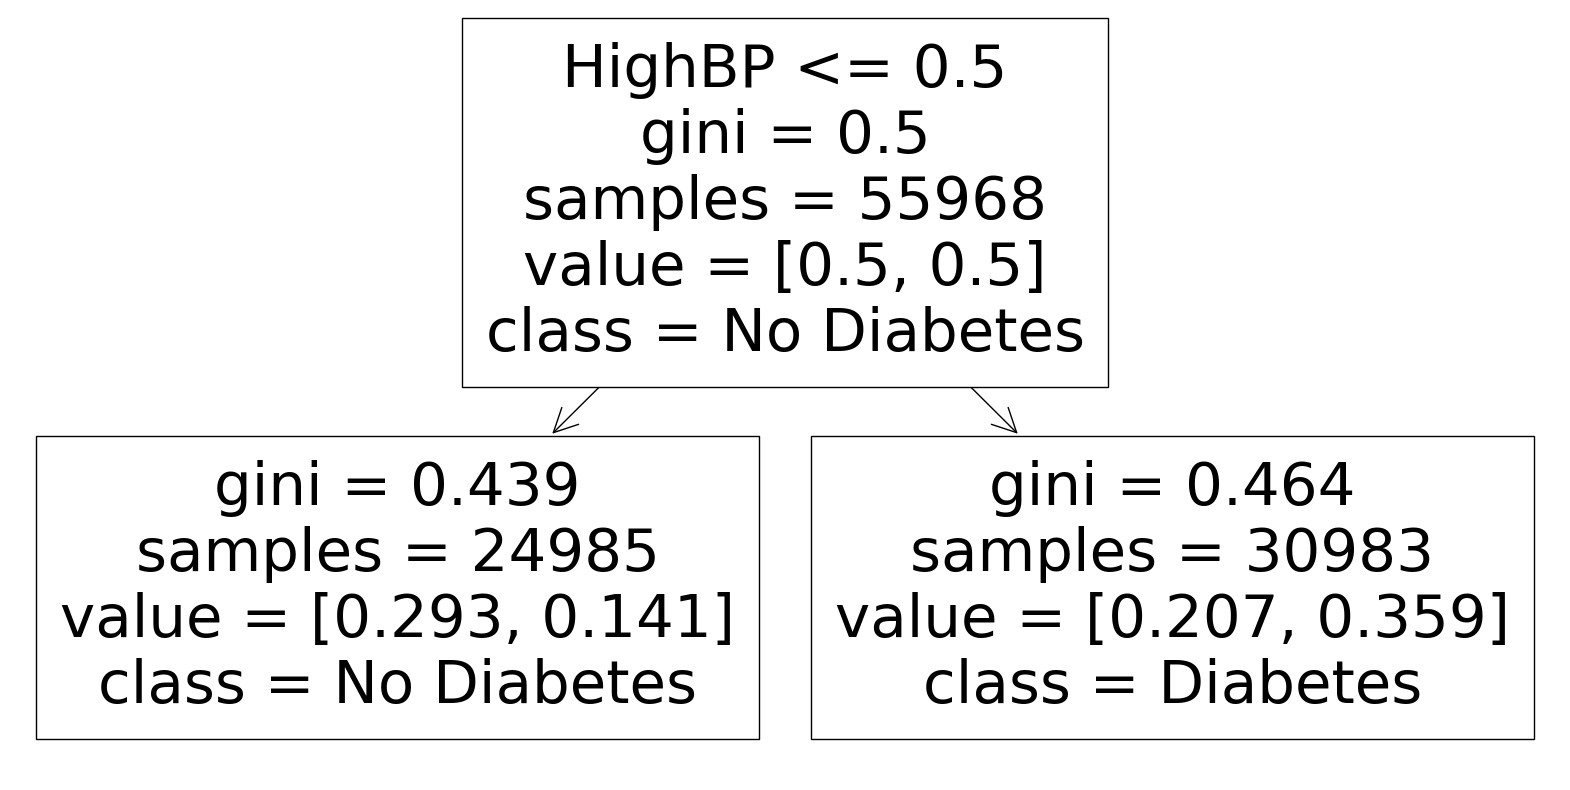

In [35]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the second tree of the model (with this model only one split and layer occurs, which is called a decision stump)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting_undersampling_random.estimators_[1],  
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/adab_model_undersampling_random{timestamp}.pkl'
joblib.dump(adaptive_boosting_undersampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/adab_model_undersampling_random20241207_145403.pkl'


#### 1.2.3.2. Example 2: Extreme Gradient Boosting

In [36]:
from xgboost import XGBClassifier

# Initialize the XGBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
extreme_gradient_boosting_undersampling_random = XGBClassifier(random_state=42)

# Train the model on the preprocessed training data
extreme_gradient_boosting_undersampling_random.fit(X_train_undersampling_random, y_train_undersampling_random)

# Make predictions on the training set
y_train_pred_undersampling_random = extreme_gradient_boosting_undersampling_random.predict(X_train_undersampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_undersampling_random = accuracy_score(y_train_undersampling_random, y_train_pred_undersampling_random)

# Make predictions on the validation set
y_val_pred = extreme_gradient_boosting_undersampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_undersampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.7850914808461978
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9443    0.6943    0.8002     21797
         1.0     0.3234    0.7810    0.4574      4078

    accuracy                         0.7080     25875
   macro avg     0.6338    0.7377    0.6288     25875
weighted avg     0.8464    0.7080    0.7462     25875



Even though, we increase the recall on the positive class compared to the adaptive boosting model on random undersampled data by ca. 2% we loose 1% of the F1 score of the positive class.

<Figure size 30000x15000 with 0 Axes>

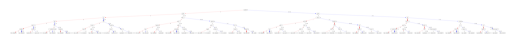

In [65]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
import xgboost as xgb


# Visualize the first tree of the model
plt.figure(figsize=(300, 150))  
plot_tree(extreme_gradient_boosting_undersampling_random)
plt.show()

It is, once more, not possible to make the xgboost tree on random undersampled data better visible.

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/xgb_model_undersampling_random{timestamp}.pkl'
joblib.dump(extreme_gradient_boosting_undersampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/xgb_model_undersampling_random20241130_183448.pkl'


## 1.3 Random Oversampling

In [37]:
# test random oversampling
X_train_oversampling_random, y_train_oversampling_random = data_loader.training_data_oversampling_random
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train_oversampling_random shape: {X_train_oversampling_random.shape}")
print(f"y_train_oversampling_random shape: {y_train_oversampling_random.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_oversampling_random shape: (299184, 21)
y_train_oversampling_random shape: (299184,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)


### 1.3.1 Decision Tree

In [38]:
# Imports for the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree model with default parameters
decision_tree_oversampling_random = DecisionTreeClassifier(random_state=42)

# Train the model on the preprocessed training data
decision_tree_oversampling_random.fit(X_train_oversampling_random, y_train_oversampling_random)

# Make predictions on the training set
y_train_pred_oversampling_random = decision_tree_oversampling_random.predict(X_train_oversampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_random = accuracy_score(y_train_oversampling_random, y_train_pred_oversampling_random)

# Make predictions on the validation set
y_val_pred = decision_tree_oversampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.9797215091716135
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8716    0.8510    0.8612     21797
         1.0     0.2931    0.3301    0.3105      4078

    accuracy                         0.7689     25875
   macro avg     0.5823    0.5905    0.5858     25875
weighted avg     0.7804    0.7689    0.7744     25875



With respect to the decision tree on random oversampled data overfitting is again an issue and also the recall and F1 score on the positive class do not seem as high as they have already been regarding other models before.

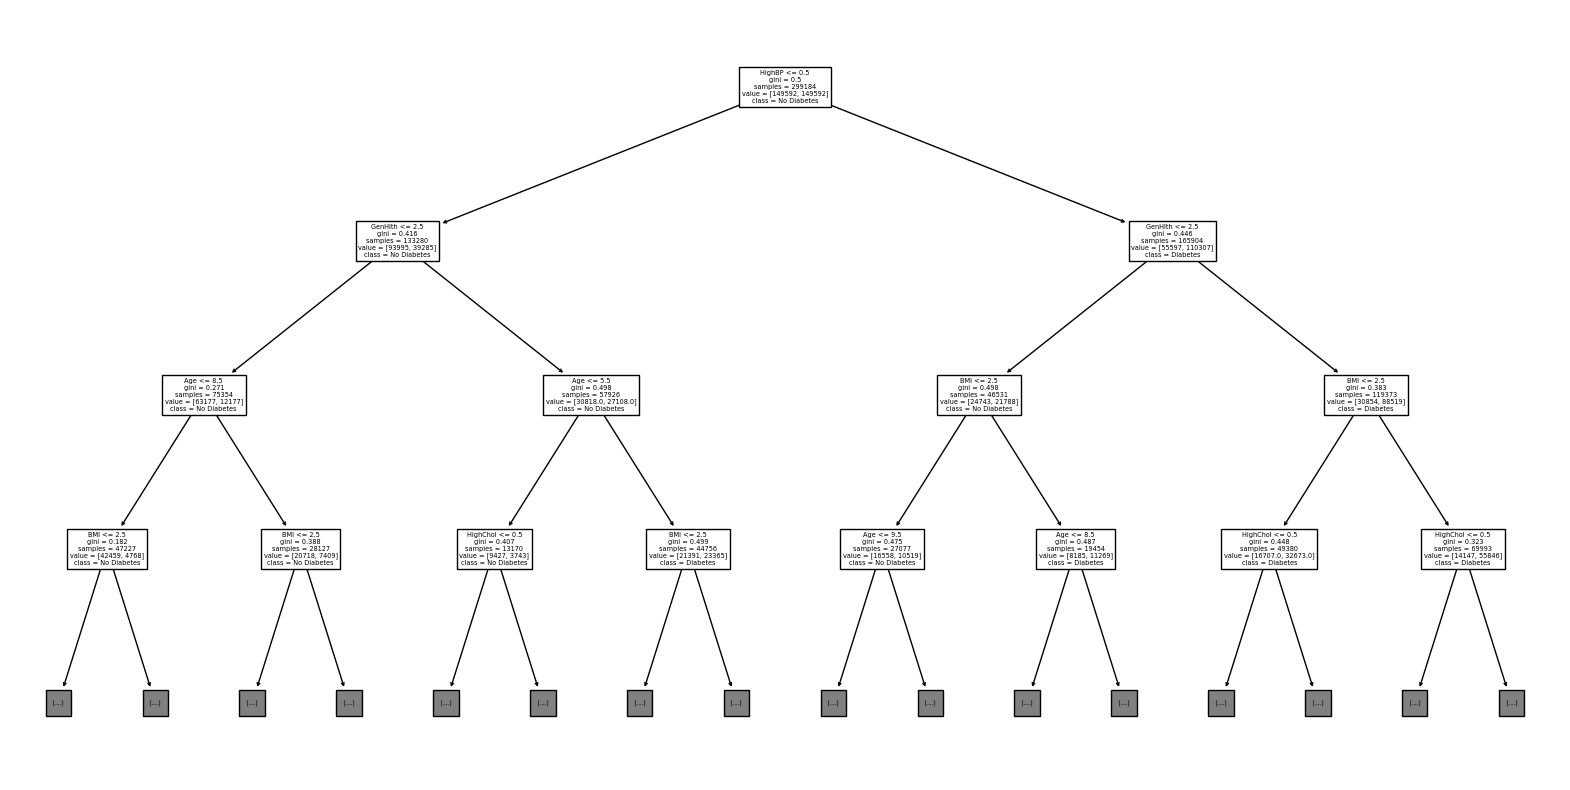

In [40]:
#TODO is three layers already too much?

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    decision_tree_oversampling_random,
    feature_names=X_train_oversampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

As with the decision tree on the preprocessed data, for the decision tree on the random oversampled data, high blood pressure appears as the root node. This does not seem very surprising as in random oversampling some data points of the positive class (minority class) of the preprocessed dataset are duplicated in order to achieve a balance within the data. On contrary, random undersampling cuts data points of the majority class ('No Diabetes') which leads to a more different dataset and difference in feature importance compared to the preprocessed data than when comparing the random oversampled data to the preprocessed data.

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/dt_model_oversampling_random{timestamp}.pkl'
joblib.dump(decision_tree_oversampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/dt_model_oversampling_random20241130_183449.pkl'


### 1.3.2 Bagging (Example: Random Forest)

In [44]:
# Initialize the random forest ensemble model with default parameters
bagging_random_forest_oversampling_random = RandomForestClassifier(random_state=42)

# Train the model on the preprocessed training data
bagging_random_forest_oversampling_random.fit(X_train_oversampling_random, y_train_oversampling_random)

# Make predictions on the training set
y_train_pred_oversampling_random = bagging_random_forest_oversampling_random.predict(X_train_oversampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_random = accuracy_score(y_train_oversampling_random, y_train_pred_oversampling_random)

# Make predictions on the validation set
y_val_pred = bagging_random_forest_oversampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.9797215091716135
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8832    0.8921    0.8876     21797
         1.0     0.3905    0.3693    0.3796      4078

    accuracy                         0.8097     25875
   macro avg     0.6368    0.6307    0.6336     25875
weighted avg     0.8055    0.8097    0.8076     25875



Overfitting is here an issue again. Compared to the standard decsion tree on random oversampled data, the recall and F1 score on the positive class went up again a bit but they are still not on a satisfactory level with  previous results in mind.

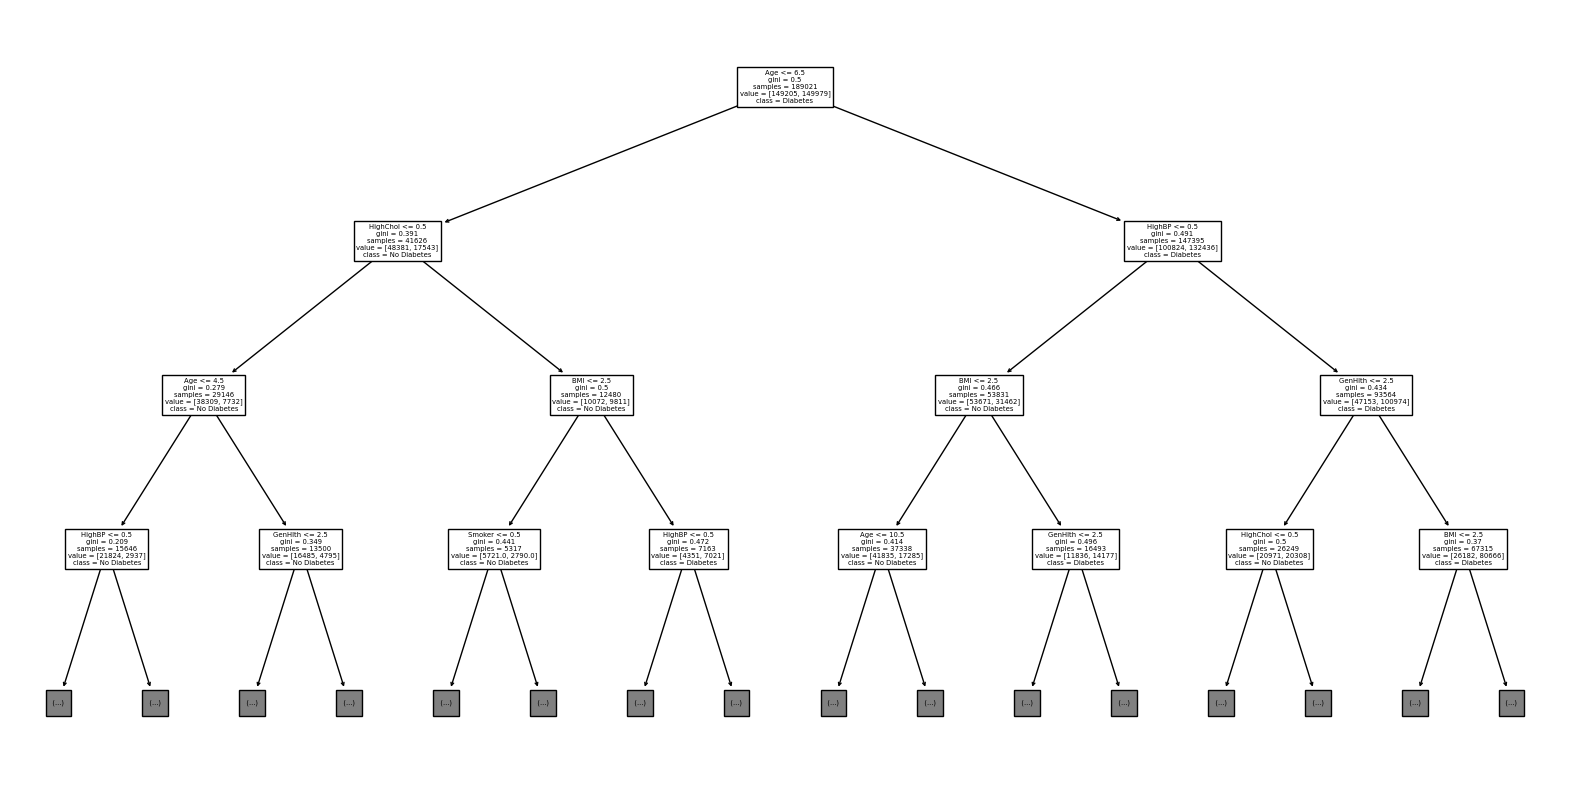

In [46]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model 
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest_oversampling_random.estimators_[0],  
    feature_names=X_train_oversampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

With respect to the points made above at the end of section 1.3.1., it is interesting to observe that for the first decision tree of the random forest on random undersampled data, age appears again as the root node also on the random oversampled data like it was the case for the proprocessed data and also the random undersampled data.

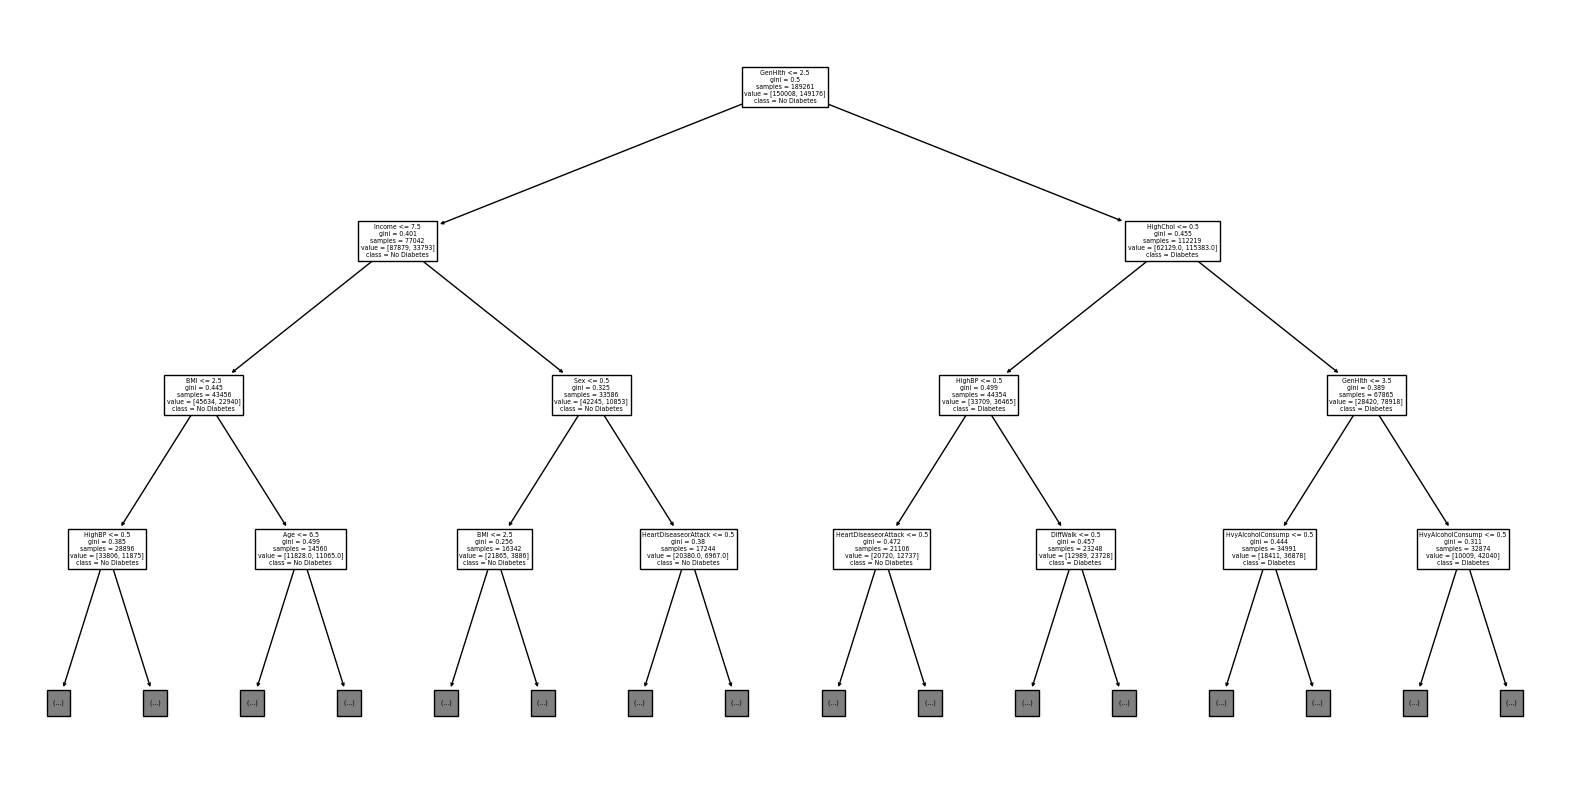

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the second tree of the model 
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest_oversampling_random.estimators_[1],  
    feature_names=X_train_oversampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

As for the second decision tree of the random forest on random undersampled data and the preprocessed data, general health appears once more as the root node also on the random oversampled data.

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/brf_model_oversampling_random{timestamp}.pkl'
joblib.dump(bagging_random_forest_oversampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/brf_model_oversampling_random20241130_183557.pkl'


### 1.3.3 Boosting

#### 1.3.3.1 Example 1: Adaptive Boosing

In [49]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
adaptive_boosting_oversampling_random = AdaBoostClassifier(random_state=42)

# Train the model on the preprocessed training data
adaptive_boosting_oversampling_random.fit(X_train_oversampling_random, y_train_oversampling_random)

# Make predictions on the training set
y_train_pred_oversampling_random = adaptive_boosting_oversampling_random.predict(X_train_oversampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_random = accuracy_score(y_train_oversampling_random, y_train_pred_oversampling_random)

# Make predictions on the validation set
y_val_pred = adaptive_boosting_oversampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.7427469383389486
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9422    0.7195    0.8160     21797
         1.0     0.3376    0.7641    0.4683      4078

    accuracy                         0.7266     25875
   macro avg     0.6399    0.7418    0.6421     25875
weighted avg     0.8469    0.7266    0.7612     25875



It is interesting to notice that the values for adaptive boosting on the random oversampled data are almost the same as the ones for random undersampled data. However, the F1 score on the positive class is a little bit higher but only when starting to look at/after the third decimal place.

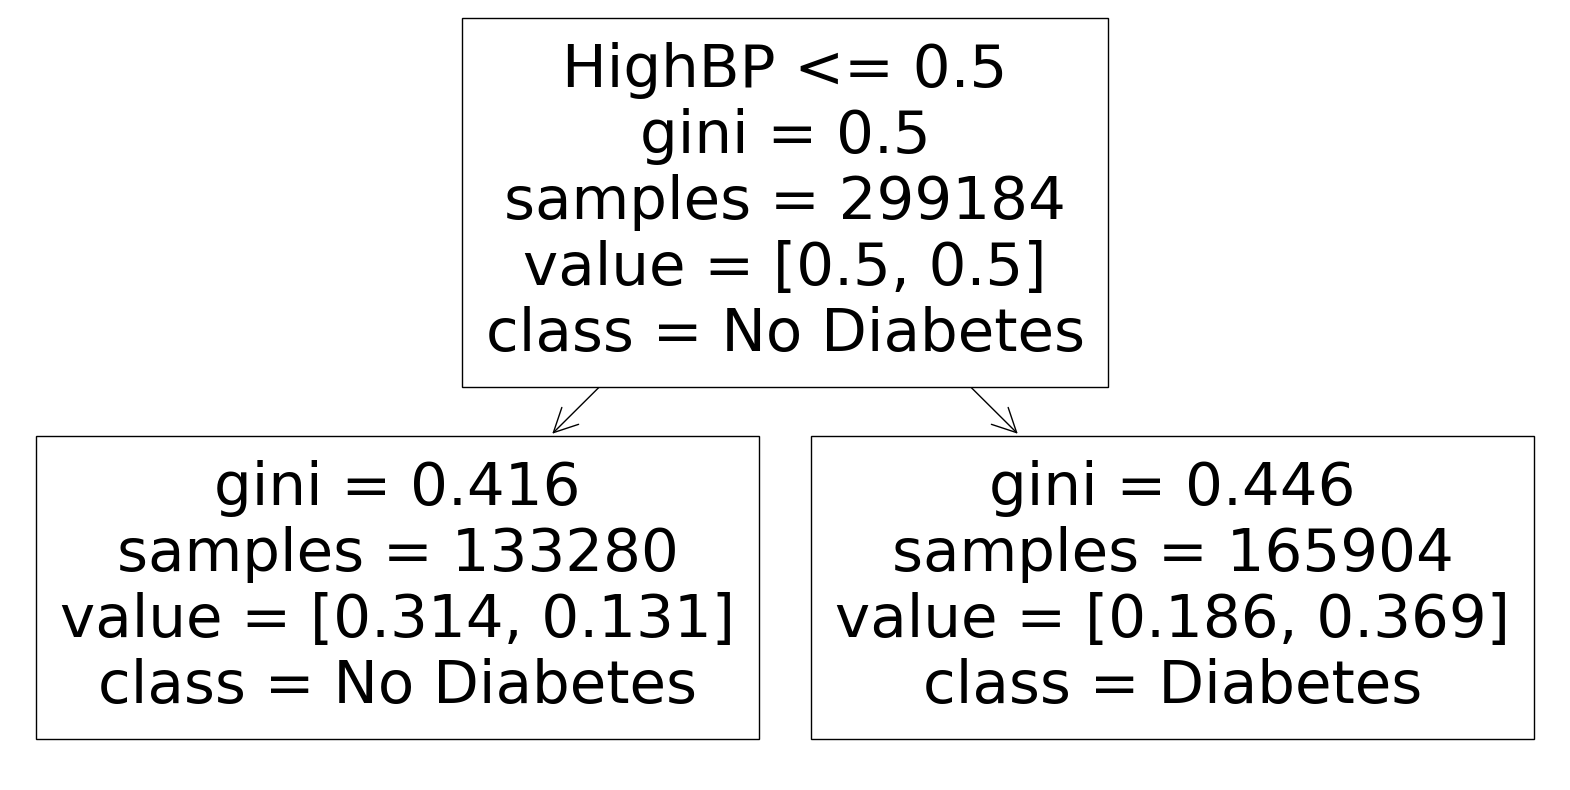

In [50]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting_oversampling_random.estimators_[0],  
    feature_names=X_train_oversampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

Here it is again the case that the first decision stump of the adaptive boosting ensemble model on the random oversampled data displays the same feature (high blood pressure) as the adaptive boosting ensemble model on the preprocessed data. However, this feature is again the feature displayed as the second decision stump of the adaptive boosting ensemble model on the random undersampled data. 

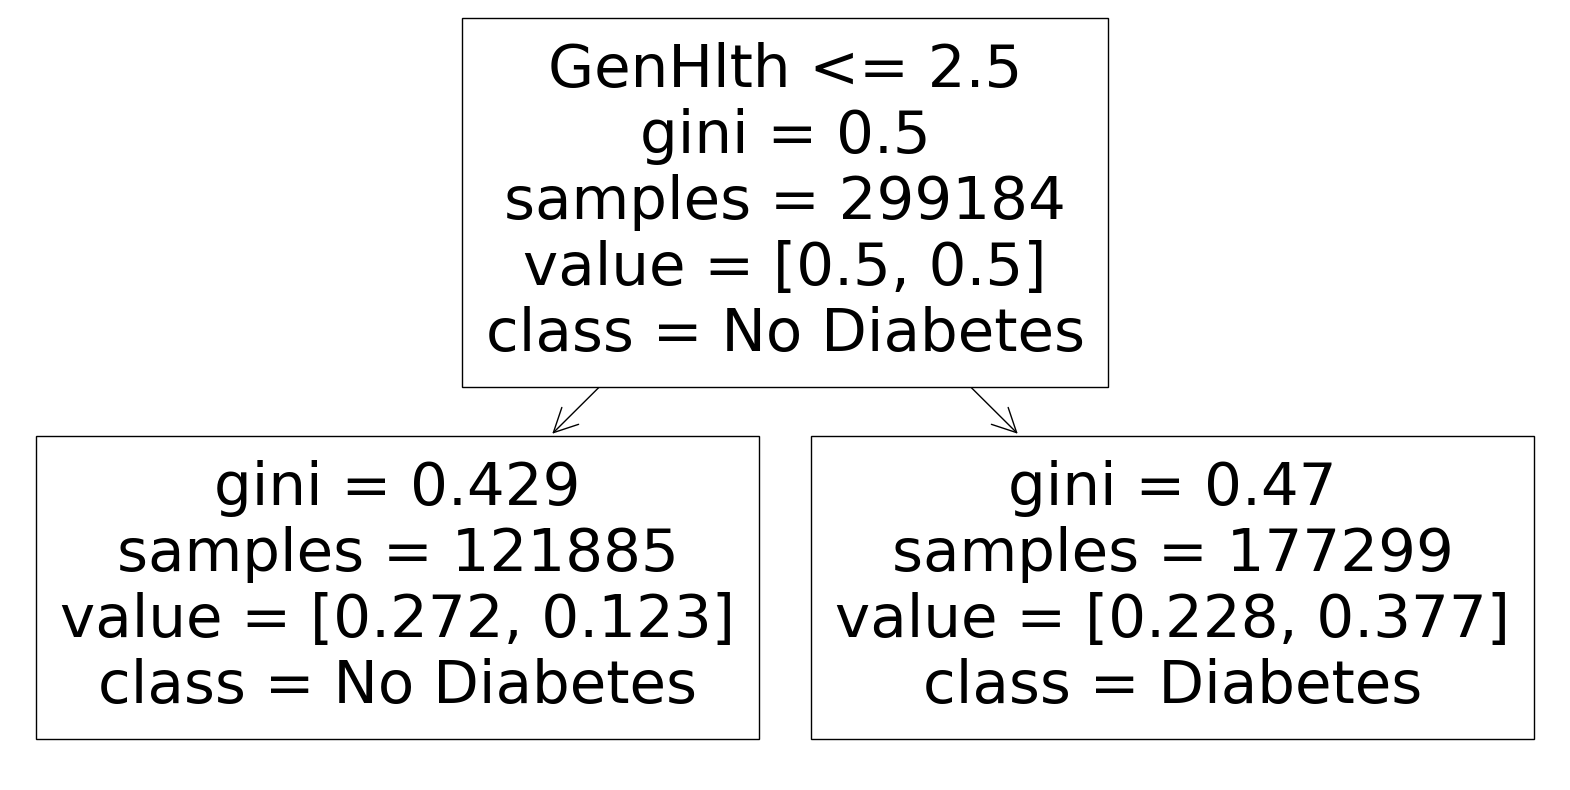

In [51]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting_oversampling_random.estimators_[1],  
    feature_names=X_train_oversampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

As already previously mentioned above, it is vice versa for the random oversampled data or preprocessed data and the random undersampled data. The second decision stump here w.r.t. to random oversampled data (and the preprocessed data) is the first decision stump w.r.t. the random undersampled data.

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/adab_model_oversampling_random{timestamp}.pkl'
joblib.dump(adaptive_boosting_oversampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/adab_model_oversampling_random20241207_192412.pkl'


#### 1.3.3.2 Example 2: Extreme Gradient Boosting

In [68]:
from xgboost import XGBClassifier

# Initialize the XGBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
extreme_gradient_boosting_oversampling_random = XGBClassifier(random_state=42)

# Train the model on the preprocessed training data
extreme_gradient_boosting_oversampling_random.fit(X_train_oversampling_random, y_train_oversampling_random)

# Make predictions on the training set
y_train_pred_oversampling_random = extreme_gradient_boosting_oversampling_random.predict(X_train_oversampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_random = accuracy_score(y_train_oversampling_random, y_train_pred_oversampling_random)

# Make predictions on the validation set
y_val_pred = extreme_gradient_boosting_oversampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.7730059094069202
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9408    0.7155    0.8128     21797
         1.0     0.3330    0.7592    0.4629      4078

    accuracy                         0.7224     25875
   macro avg     0.6369    0.7373    0.6379     25875
weighted avg     0.8450    0.7224    0.7576     25875



The slight overfitting is a minor issue with respect to extreme gradient boosting on the random oversampled data. What is very satisfactory in this case are the high recall and F1 score on the positive class.

<Figure size 30000x15000 with 0 Axes>

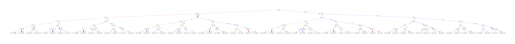

In [69]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
import xgboost as xgb


# Visualize the first tree of the model
plt.figure(figsize=(300, 150))  
plot_tree(extreme_gradient_boosting_oversampling_random)
plt.show()

No better display of the extreme gradient boosting tree on random oversampled data possible.

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/xgb_model_oversampling_random{timestamp}.pkl'
joblib.dump(extreme_gradient_boosting_oversampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/xgb_model_oversampling_random20241207_192440.pkl'


## 1.4 SMOTE Oversampling

In [71]:
# test smote oversampling
X_train_oversampling_smote, y_train_oversampling_smote = data_loader.training_data_oversampling_smote
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train_oversampling_smote shape: {X_train_oversampling_smote.shape}")
print(f"y_train_oversampling_smote shape: {y_train_oversampling_smote.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_oversampling_smote shape: (299184, 21)
y_train_oversampling_smote shape: (299184,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)


### 1.4.1 Decision Tree

In [72]:
# Imports for the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree model with default parameters
decision_tree_oversampling_smote = DecisionTreeClassifier(random_state=42)

# Train the model on the preprocessed training data
decision_tree_oversampling_smote.fit(X_train_oversampling_smote, y_train_oversampling_smote)

# Make predictions on the training set
y_train_pred_oversampling_smote = decision_tree_oversampling_smote.predict(X_train_oversampling_smote)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote = accuracy_score(y_train_oversampling_smote, y_train_pred_oversampling_smote)

# Make predictions on the validation set
y_val_pred = decision_tree.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote)
print("Classification Report:\n", report)

Training Accuracy 0.9883917589175891
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8723    0.8666    0.8694     21797
         1.0     0.3111    0.3220    0.3164      4078

    accuracy                         0.7808     25875
   macro avg     0.5917    0.5943    0.5929     25875
weighted avg     0.7839    0.7808    0.7823     25875



For the standard decision tree on the SMOTE oversampled data we have again the problem of overfitting and also the recall and F1 score on the positive class are quite low in this case.

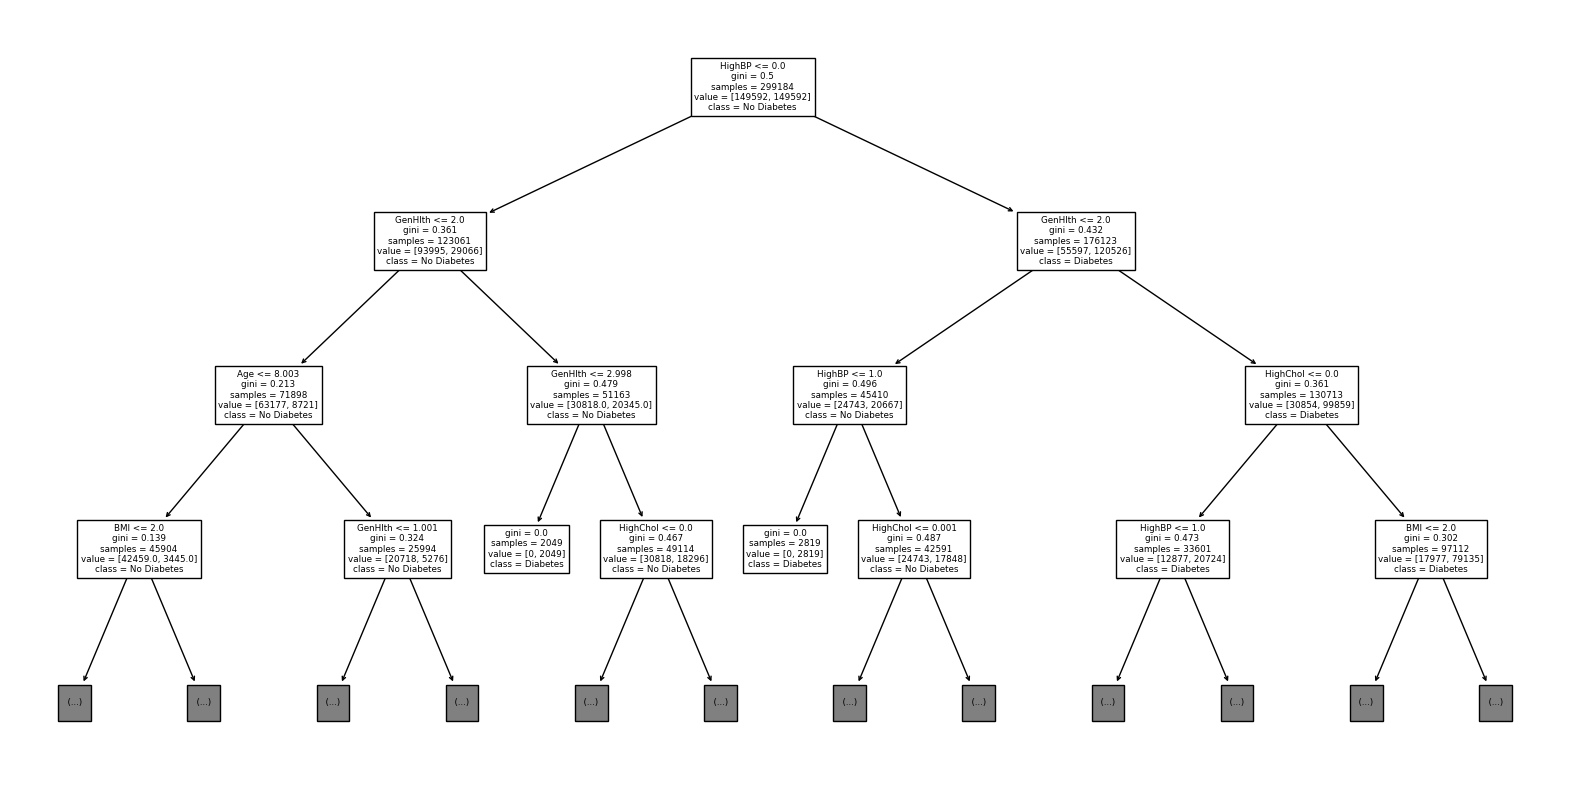

In [73]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    decision_tree_oversampling_smote,
    feature_names=X_train_oversampling_smote.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

High blood pressure is again, like in the case of the preprocessed and random oversampled data, the most important feature in the standard decision tree. General health comes likewise second.

What is noticable is that there already appears a decision/prediction for 'Diabetes' twice within the first three layers of the tree which was not the case in any of the previous trees. Therefore, there are two ways to get to the 'Diabetes' prediction.

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/dt_model_oversampling_smote{timestamp}.pkl'
joblib.dump(decision_tree_oversampling_smote, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/dt_model_oversampling_smote20241130_183605.pkl'


### 1.4.2 Bagging (Example: Random Forest)

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the random forest ensemble model with default parameters
bagging_random_forest_oversampling_smote = RandomForestClassifier(random_state=42)

# Train the model on the preprocessed training data
bagging_random_forest_oversampling_smote.fit(X_train_oversampling_smote, y_train_oversampling_smote)

# Make predictions on the training set
y_train_pred_oversampling_smote = bagging_random_forest_oversampling_smote.predict(X_train_oversampling_smote)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote = accuracy_score(y_train_pred_oversampling_smote, y_train_pred_oversampling_smote)

# Make predictions on the validation set
y_val_pred = bagging_random_forest_oversampling_smote.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote)
print("Classification Report:\n", report)

Training Accuracy 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8731    0.9347    0.9029     21797
         1.0     0.4400    0.2742    0.3378      4078

    accuracy                         0.8306     25875
   macro avg     0.6566    0.6044    0.6203     25875
weighted avg     0.8049    0.8306    0.8138     25875



Here again we are overfitting and also the recall and F1 score on the positive class are not really to our satisfaction.

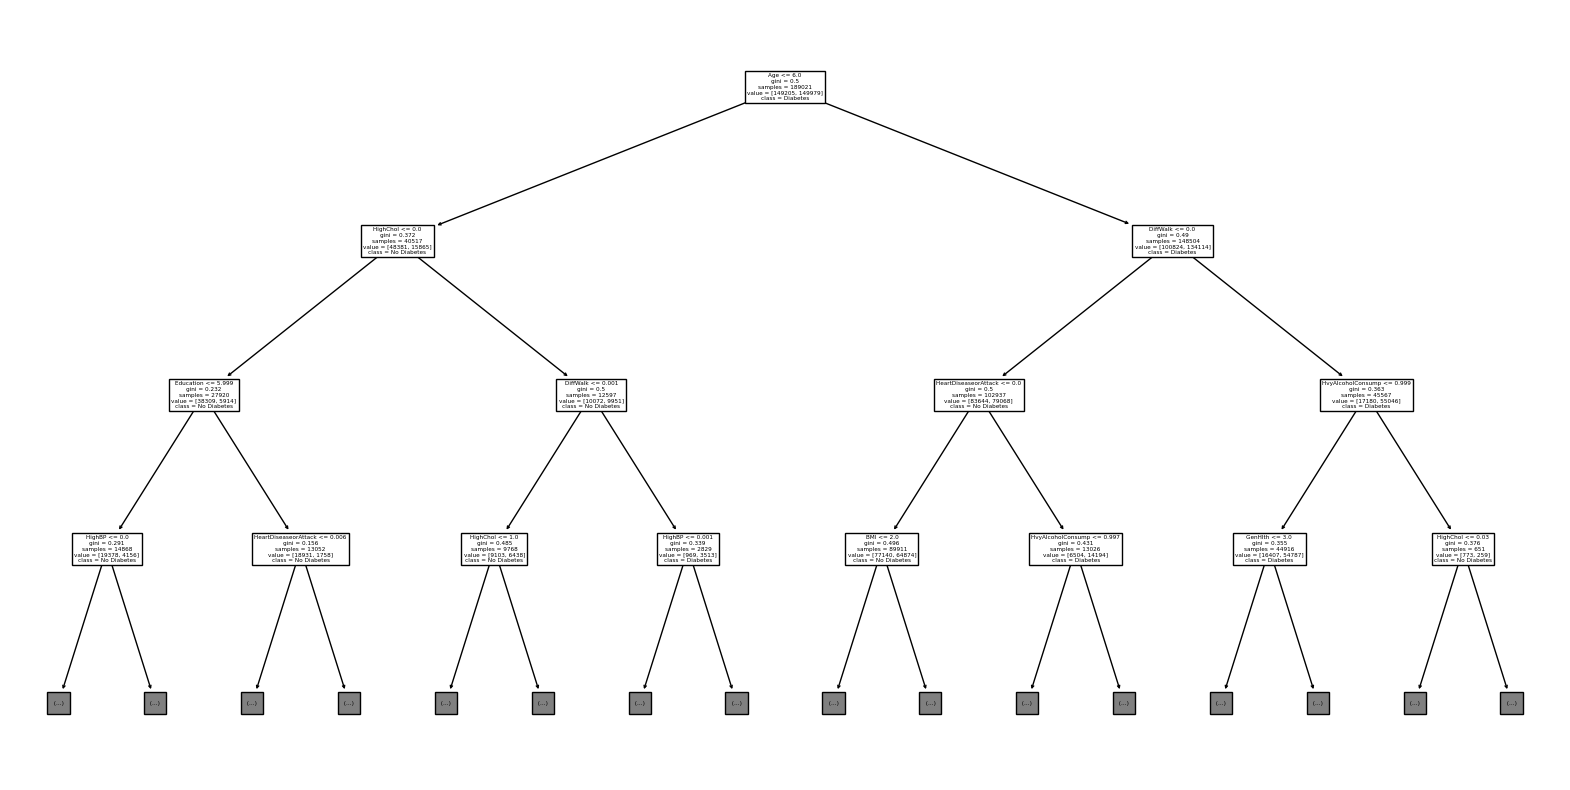

In [75]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model 
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest_oversampling_smote.estimators_[0],  
    feature_names=X_train_oversampling_smote.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

Once more, for the first decision tree out of the random forest age appears as the most important feature in this case. 

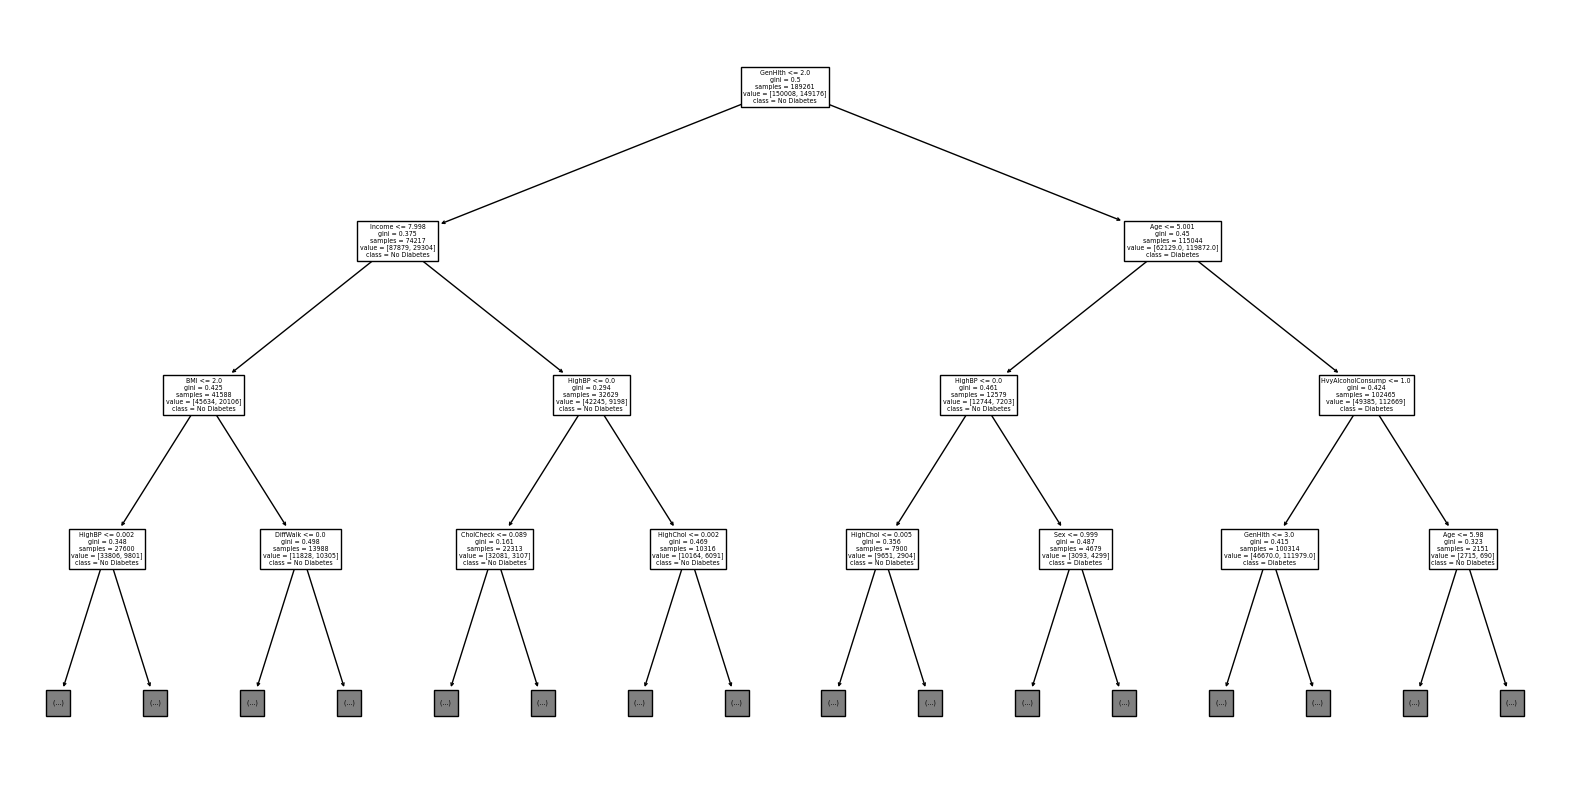

In [76]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model 
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest_oversampling_smote.estimators_[1],  
    feature_names=X_train_oversampling_smote.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

And general health is, once again, the most important feature with respect to the second decision tree displayed out of the random forest on SMOTE oversampled data.

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/brf_model_oversampling_smote{timestamp}.pkl'
joblib.dump(bagging_random_forest_oversampling_smote, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/brf_model_oversampling_smote20241130_183741.pkl'


### 1.4.3 Boosting

#### 1.4.3.1 Example 1: Adaptive Booosting

In [78]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
adaptive_boosting_oversampling_smote = AdaBoostClassifier(random_state=42)

# Train the model on the preprocessed training data
adaptive_boosting_oversampling_smote.fit(X_train_oversampling_smote, y_train_oversampling_smote)

# Make predictions on the training set
y_train_pred_oversampling_smote = adaptive_boosting_oversampling_smote.predict(X_train_oversampling_smote)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote = accuracy_score(y_train_oversampling_smote, y_train_pred_oversampling_smote)

# Make predictions on the validation set
y_val_pred = adaptive_boosting_oversampling_smote.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote)
print("Classification Report:\n", report)

Training Accuracy 0.8184662281405423
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9233    0.7937    0.8536     21797
         1.0     0.3700    0.6474    0.4708      4078

    accuracy                         0.7707     25875
   macro avg     0.6466    0.7206    0.6622     25875
weighted avg     0.8361    0.7707    0.7933     25875



Above we can see that with adaptive boosting on SMOTE oversampled data, overfitting is not such a severe problem anymore.  

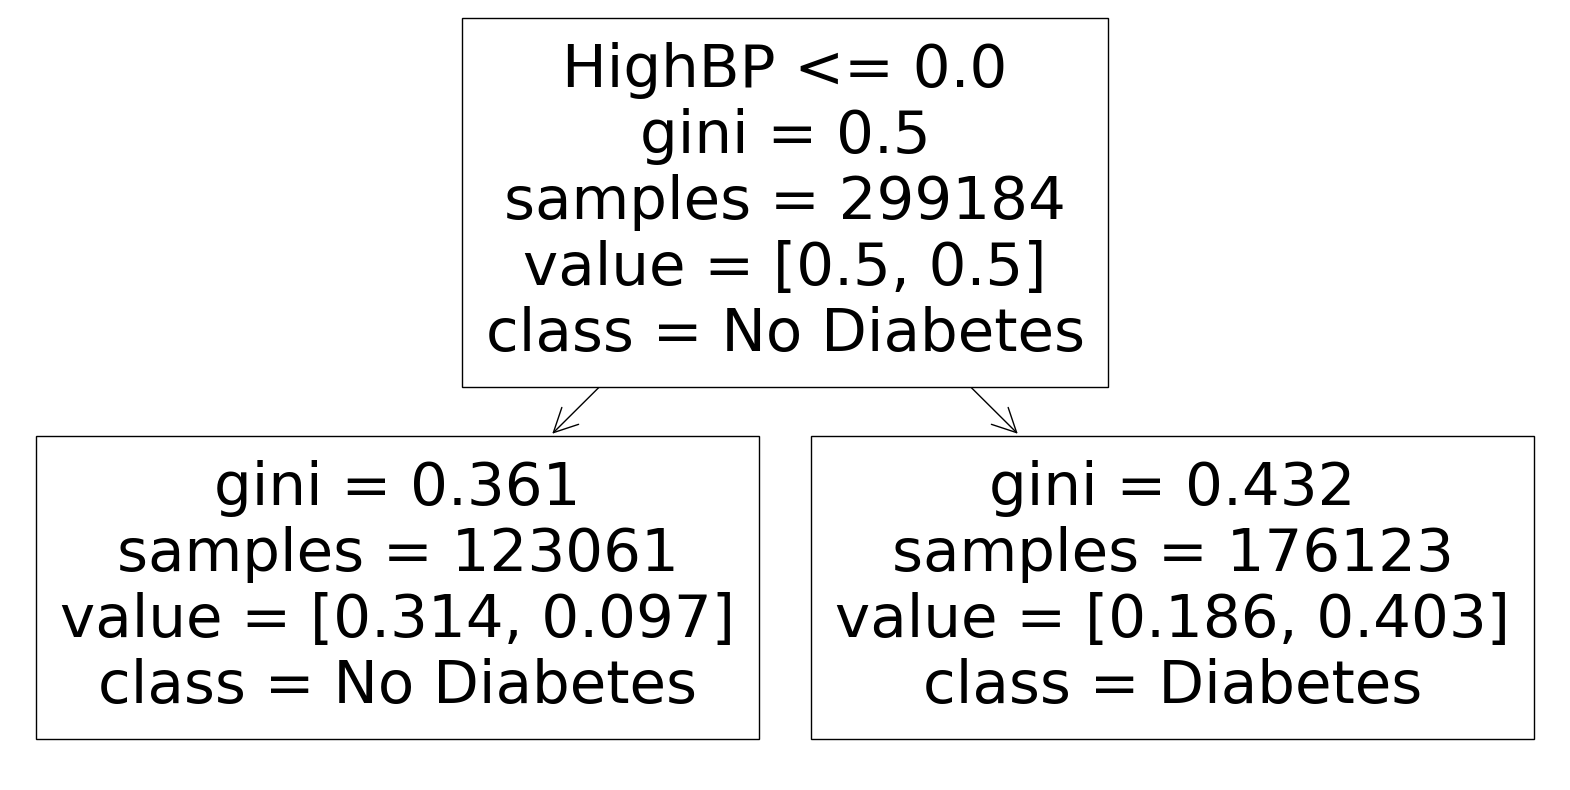

In [79]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting_oversampling_smote.estimators_[0],  
    feature_names=X_train_oversampling_smote.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

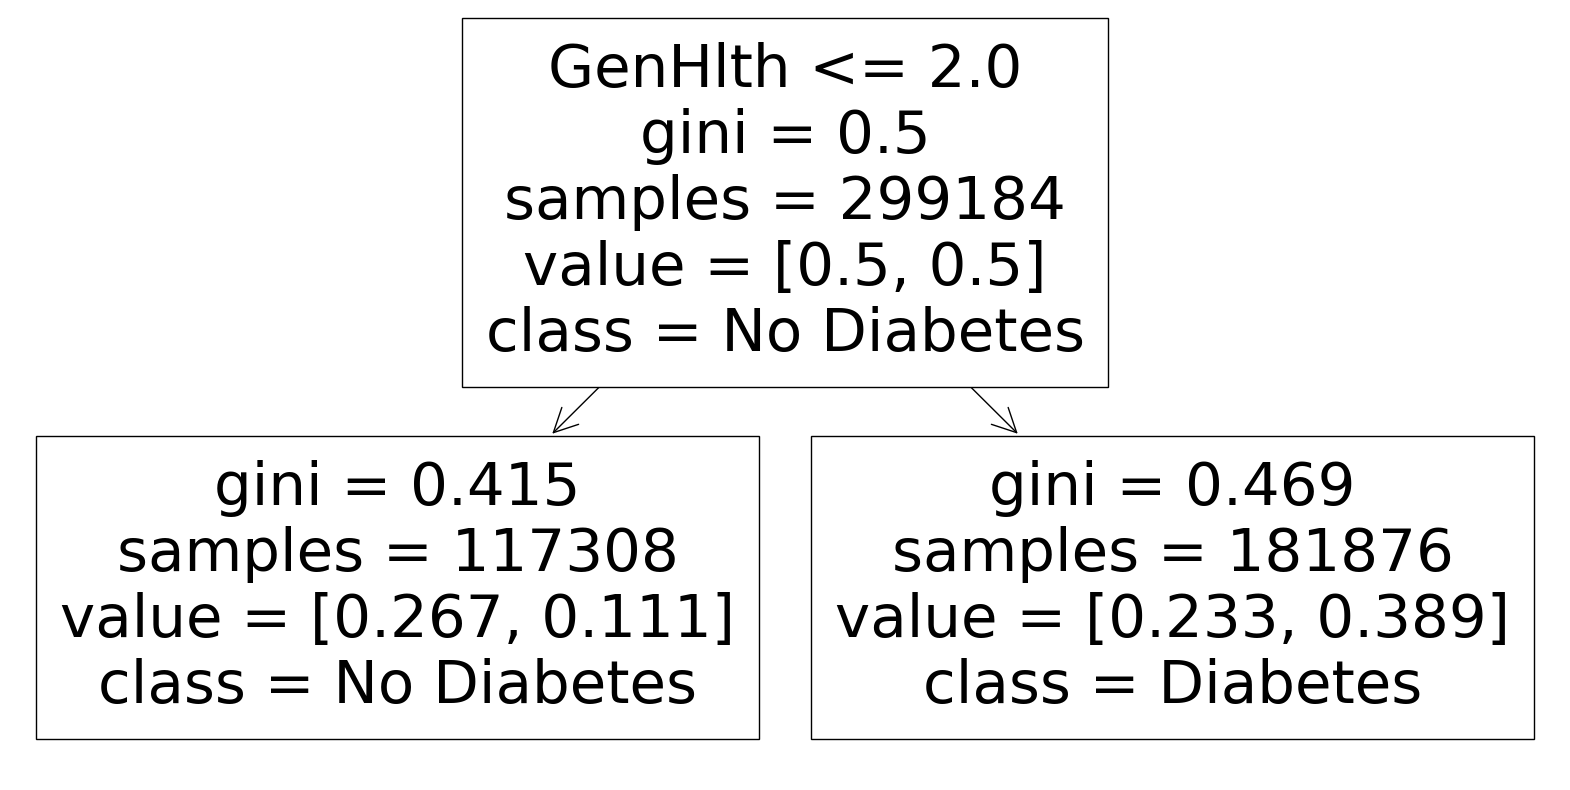

In [80]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting_oversampling_smote.estimators_[1],  
    feature_names=X_train_oversampling_smote.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/adab_model_oversampling_smote{timestamp}.pkl'
joblib.dump(adaptive_boosting_oversampling_smote, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/adab_model_oversampling_smote20241130_183747.pkl'


#### 1.4.3.1 Example 2: Extreme Gradient Boosting

In [83]:
from xgboost import XGBClassifier

# Initialize the XGBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
extreme_gradient_boosting_oversampling_smote = XGBClassifier(random_state=42)

# Train the model on the preprocessed training data
extreme_gradient_boosting_oversampling_smote.fit(X_train_oversampling_smote, y_train_oversampling_smote)

# Make predictions on the training set
y_train_pred_oversampling_smote = extreme_gradient_boosting_oversampling_smote.predict(X_train_oversampling_smote)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote = accuracy_score(y_train_oversampling_smote, y_train_pred_oversampling_smote)

# Make predictions on the validation set
y_val_pred = extreme_gradient_boosting_oversampling_smote.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote)
print("Classification Report:\n", report)

Training Accuracy 0.906171453018878
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8711    0.9588    0.9128     21797
         1.0     0.5228    0.2415    0.3304      4078

    accuracy                         0.8457     25875
   macro avg     0.6970    0.6001    0.6216     25875
weighted avg     0.8162    0.8457    0.8210     25875



Overfitting is not so much of an issue here but rather the low recall and F1 score on the positive class. 

<Figure size 30000x15000 with 0 Axes>

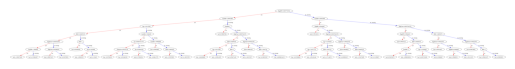

In [97]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
import xgboost as xgb


# Visualize the first tree of the model
plt.figure(figsize=(300, 150))  
plot_tree(extreme_gradient_boosting_oversampling_smote)
plt.show()

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/xgb_model_oversampling_smote{timestamp}.pkl'
joblib.dump(extreme_gradient_boosting_oversampling_smote, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/xgb_model_oversampling_smote20241130_183749.pkl'


## 1.5 SMOTE Tomek

In [81]:
X_train_oversampling_smote_tomek, y_train_oversampling_smote_tomek = data_loader.training_data_resampling_smote_tomek
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train_oversampling_smote shape: {X_train_oversampling_smote_tomek.shape}")
print(f"y_train_oversampling_smote shape: {y_train_oversampling_smote_tomek.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_oversampling_smote shape: (298548, 21)
y_train_oversampling_smote shape: (298548,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)


### 1.5.1 Decision Tree

In [82]:
# Imports for the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree model with default parameters
decision_tree_oversampling_smote_tomek = DecisionTreeClassifier(random_state=42)

# Train the model on the preprocessed training data
decision_tree_oversampling_smote_tomek.fit(X_train_oversampling_smote_tomek, y_train_oversampling_smote_tomek)

# Make predictions on the training set
y_train_pred_oversampling_smote_tomek = decision_tree_oversampling_smote_tomek.predict(X_train_oversampling_smote_tomek)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote_tomek = accuracy_score(y_train_oversampling_smote_tomek, y_train_pred_oversampling_smote_tomek)

# Make predictions on the validation set
y_val_pred = decision_tree_oversampling_smote_tomek.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote_tomek)
print("Classification Report:\n", report)

Training Accuracy 0.9883670297573589
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8747    0.8656    0.8701     21797
         1.0     0.3193    0.3369    0.3279      4078

    accuracy                         0.7823     25875
   macro avg     0.5970    0.6013    0.5990     25875
weighted avg     0.7871    0.7823    0.7847     25875



Here overfitting is a severe problem and also the rather low values for the recall and F1 score on the positive class.

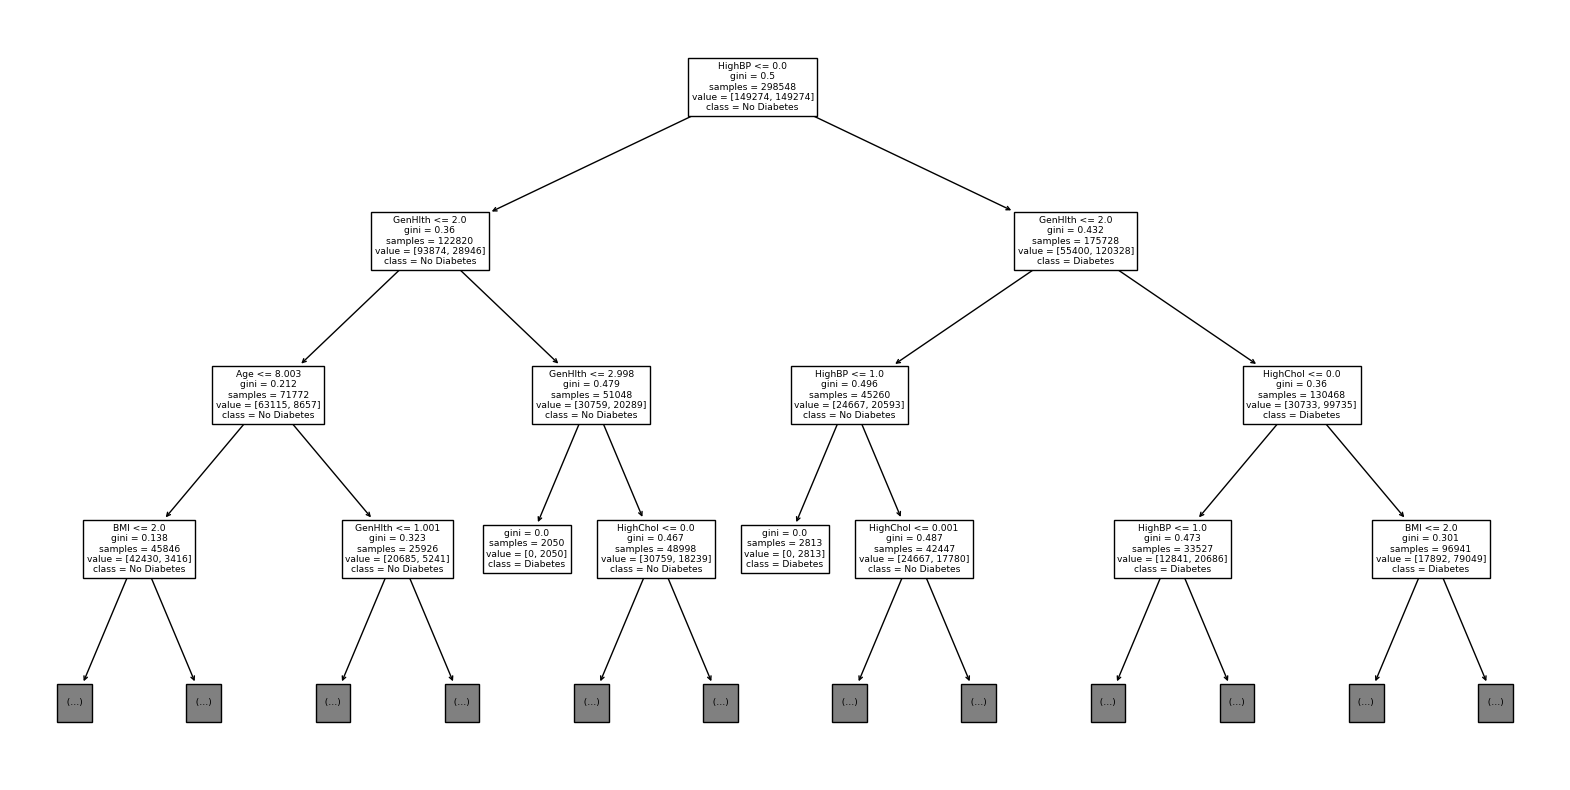

In [84]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    decision_tree_oversampling_smote_tomek,
    feature_names=X_train_oversampling_smote_tomek.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/dt_model_oversampling_smote_tomek{timestamp}.pkl'
joblib.dump(decision_tree_oversampling_smote_tomek, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/dt_model_oversampling_smote_tomek20241130_183750.pkl'


### 1.5.2 Bagging (Example: Random Forest)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the random forest ensemble model with default parameters
bagging_random_forest_oversampling_smote_tomek = RandomForestClassifier(random_state=42)

# Train the model on the preprocessed training data
bagging_random_forest_oversampling_smote_tomek.fit(X_train_oversampling_smote_tomek, y_train_oversampling_smote_tomek)

# Make predictions on the training set
y_train_pred_oversampling_smote_tomek = bagging_random_forest_oversampling_smote_tomek.predict(X_train_oversampling_smote_tomek)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote = accuracy_score(y_train_oversampling_smote_tomek, y_train_pred_oversampling_smote_tomek)

# Make predictions on the validation set
y_val_pred = bagging_random_forest_oversampling_smote.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote_tomek)
print("Classification Report:\n", report)

Training Accuracy 0.9883670297573589
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8731    0.9347    0.9029     21797
         1.0     0.4400    0.2742    0.3378      4078

    accuracy                         0.8306     25875
   macro avg     0.6566    0.6044    0.6203     25875
weighted avg     0.8049    0.8306    0.8138     25875



Overfitting is an issue, as well as low recall and F1 scores on the positive class.

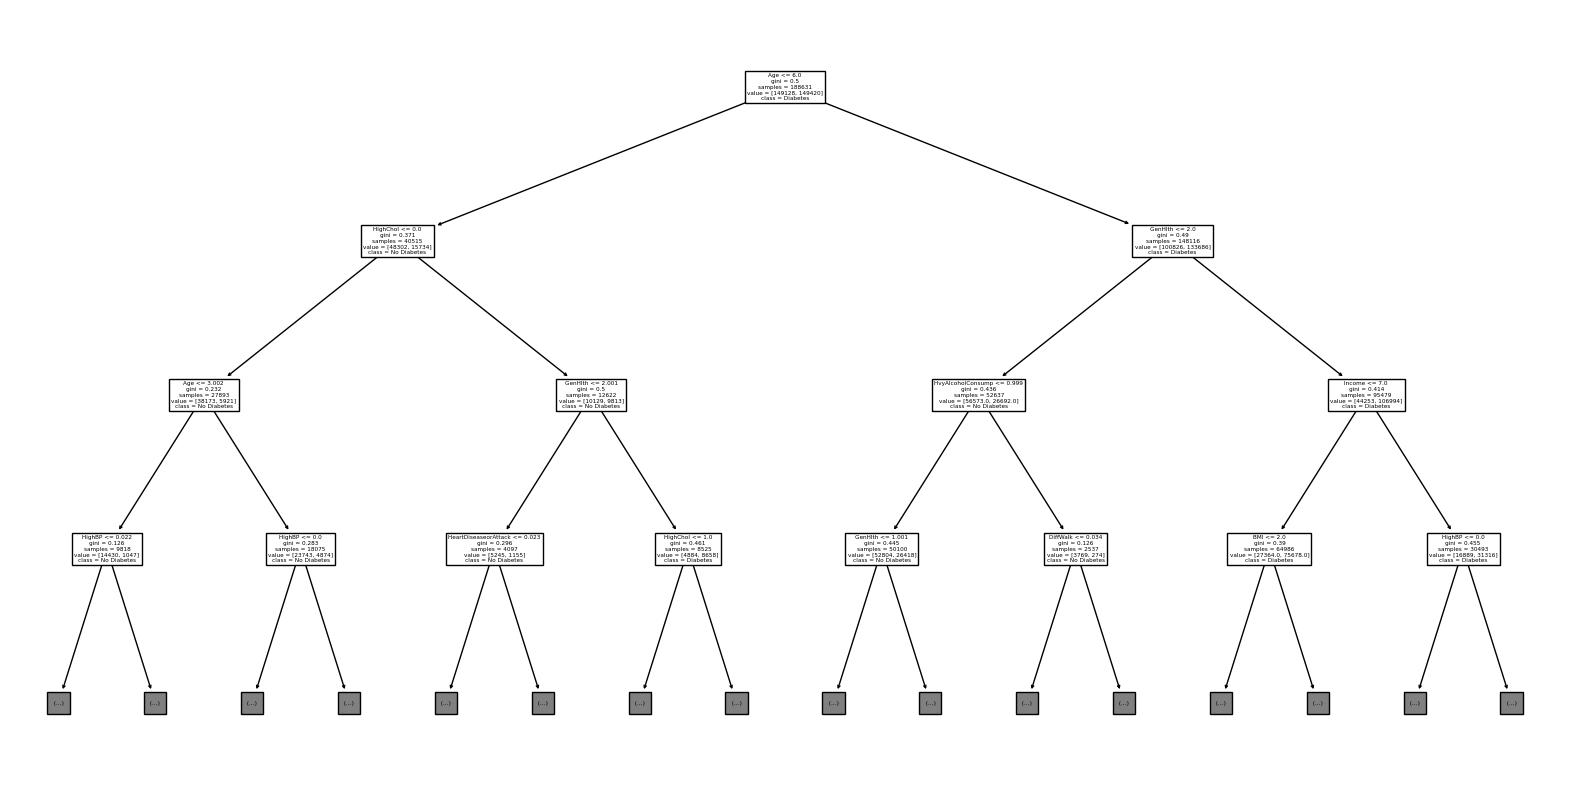

In [86]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model 
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest_oversampling_smote_tomek.estimators_[0],  
    feature_names=X_train_oversampling_smote_tomek.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/brf_model_oversampling_smote_tomek{timestamp}.pkl'
joblib.dump(bagging_random_forest_oversampling_smote_tomek, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/brf_model_oversampling_smote_tomek20241130_183926.pkl'


### 1.5.3 Boosting

#### 1.5.3.1 Example 1: Adaptive Boosting

In [109]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
adaptive_boosting_oversampling_smote_tomek = AdaBoostClassifier(random_state=42)

# Train the model on the preprocessed training data
adaptive_boosting_oversampling_smote_tomek.fit(X_train_oversampling_smote_tomek, y_train_oversampling_smote_tomek)

# Make predictions on the training set
y_train_pred_oversampling_smote_tomek = adaptive_boosting_oversampling_smote_tomek.predict(X_train_oversampling_smote_tomek)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote_tomek = accuracy_score(y_train_oversampling_smote_tomek, y_train_pred_oversampling_smote_tomek)

# Make predictions on the validation set
y_val_pred = adaptive_boosting_oversampling_smote_tomek.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote_tomek)
print("Classification Report:\n", report)

Training Accuracy 0.8191547087905462
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9232    0.7941    0.8538     21797
         1.0     0.3702    0.6471    0.4710      4078

    accuracy                         0.7709     25875
   macro avg     0.6467    0.7206    0.6624     25875
weighted avg     0.8361    0.7709    0.7935     25875



Overfitting is just a minor problem here and we have very good values for the recall and F1 score on the positive class.

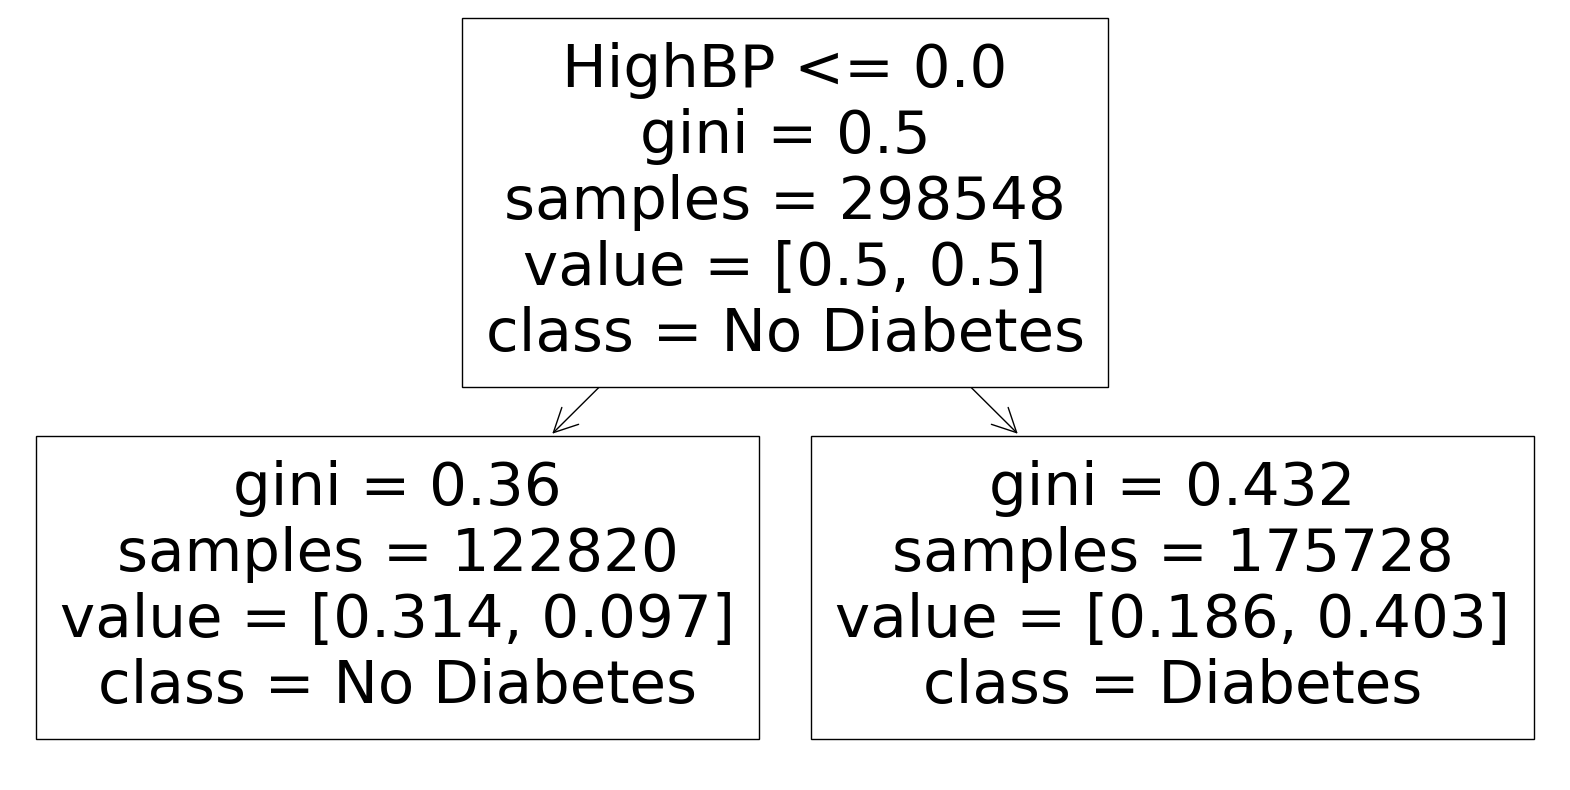

In [110]:
#TODO only one layer => decision stump

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting_oversampling_smote_tomek.estimators_[0],  
    feature_names=X_train_oversampling_smote_tomek.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

#### 1.5.3.2 Example 2: Extreme Gradient Boosting

In [111]:
from xgboost import XGBClassifier

# Initialize the XGBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
extreme_gradient_boosting_oversampling_smote_tomek = XGBClassifier(random_state=42)

# Train the model on the preprocessed training data
extreme_gradient_boosting_oversampling_smote_tomek.fit(X_train_oversampling_smote_tomek, y_train_oversampling_smote_tomek)

# Make predictions on the training set
y_train_pred_oversampling_smote_tomek = extreme_gradient_boosting_oversampling_smote_tomek.predict(X_train_oversampling_smote_tomek)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote_tomek = accuracy_score(y_train_oversampling_smote_tomek, y_train_pred_oversampling_smote_tomek)

# Make predictions on the validation set
y_val_pred = extreme_gradient_boosting_oversampling_smote_tomek.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote_tomek)
print("Classification Report:\n", report)

Training Accuracy 0.9062663290325174
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8709    0.9573    0.9120     21797
         1.0     0.5138    0.2413    0.3284      4078

    accuracy                         0.8444     25875
   macro avg     0.6924    0.5993    0.6202     25875
weighted avg     0.8146    0.8444    0.8200     25875



Overfitting is not such a huge problem here but the values for the recall and F1 score on the positive class are rather low.

<Figure size 30000x15000 with 0 Axes>

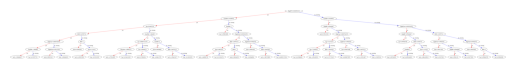

In [112]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
import xgboost as xgb


# Visualize the first tree of the model
plt.figure(figsize=(300, 150))  
plot_tree(extreme_gradient_boosting_oversampling_smote_tomek)
plt.show()


In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/xgb_model_oversampling_smote_tomek{timestamp}.pkl'
joblib.dump(extreme_gradient_boosting_oversampling_smote_tomek, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/xgb_model_oversampling_smote_tomek20241130_183934.pkl'


# 2. Hyperparameter Tuning (with Cross-Validation and PCA) - Each Model

## 2.1 Halving Grid Search for Decision Tree Classifier (with Cross-Validation and PCA)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

pipeline = Pipeline(
    [
        ("resampler", None),  # Placeholder for resampling method
        ("pca", None),  # Placeholder for PCA
        ('classifier', None)  # Placeholder for classifier
    ]
)

param_grid = [
# Source of Hyperparameters for Decision Tree & ChatGPT (ranges for large dataset):  https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e
    {
    'classifier': [DecisionTreeClassifier()],
    'classifier__max_depth': [1, 2, 5, 10, 50, 100, None], 
    'classifier__max_leaf_nodes': [1, 2, 5, 10, 50, 100, 500, None], 
    'classifier__max_features': ['auto', 'sqrt', 'log2', None],  
    'classifier__min_samples_split': [2, 5, 10, 50, 100], 
    'classifier__min_samples_leaf': [1, 2, 5, 10, 20, 50], 
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],  
    'classifier__splitter': ['best', 'random'],  
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [None, PCA(n_components=5), PCA(n_components=10), PCA(n_components=None)
    ]  # PCA options for dimensionality reduction.
}
]

# Set up HalvingGridSearchCV
dt_halving_grid_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="f1",  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1,  # To track progress
)

# Fit the halving grid search on training data
dt_halving_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", dt_halving_grid_search.best_params_)
print("Best Cross-Validation F1 Score:", dt_halving_grid_search.best_score_)

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the best model from the halving grid search
dt_best_model = dt_halving_grid_search.best_estimator_

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/dt_best_model_cv_sampling_pca{timestamp}.pkl'
joblib.dump(dt_best_model, model_filename)

print(f"Best model saved to '{model_filename}'")

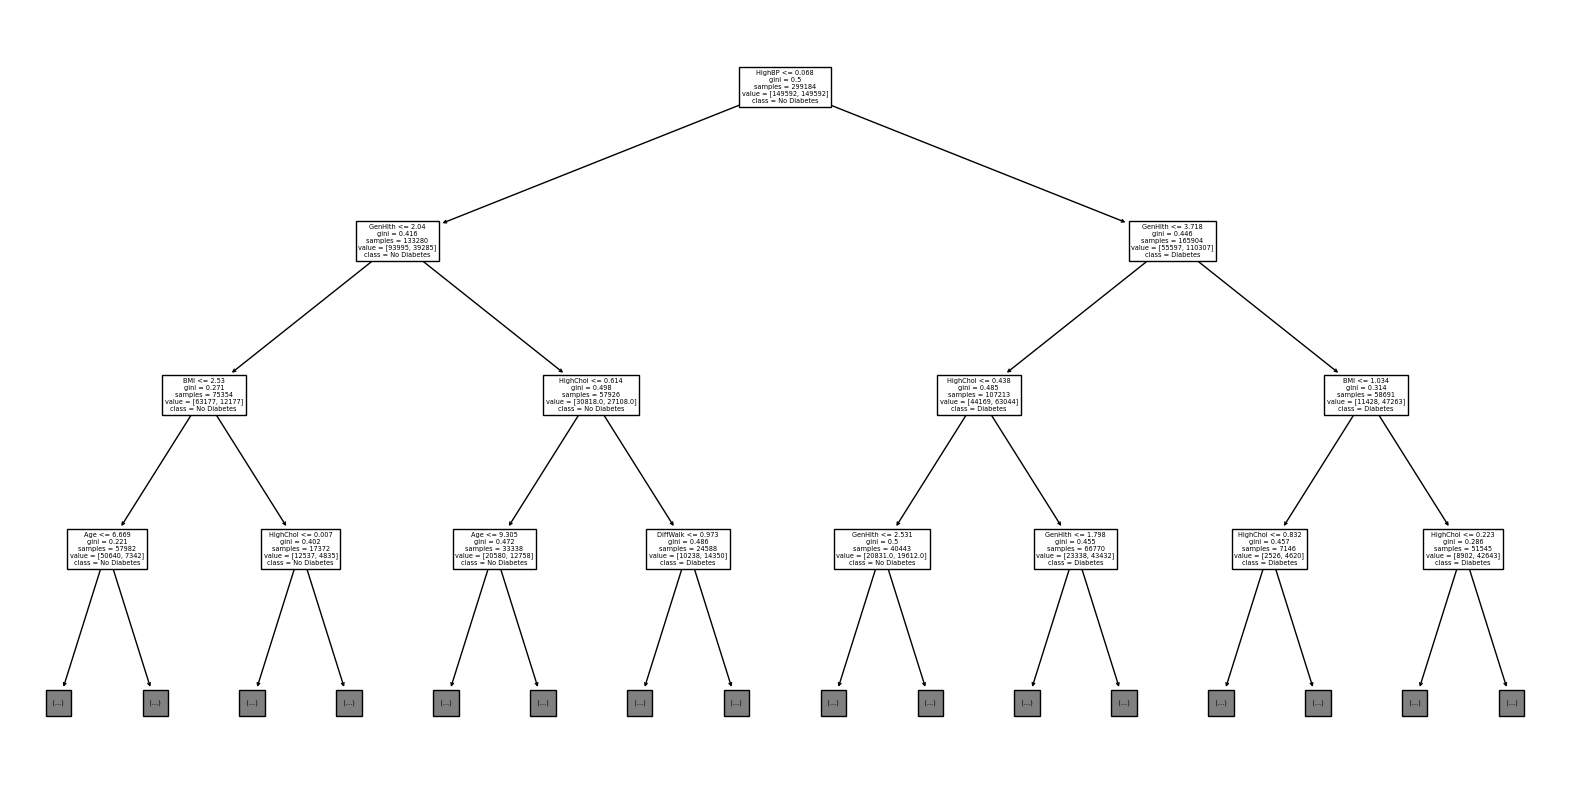

In [ ]:
# Access the saved model
dc_filename = "../../models/decision_trees_ensembles/dt_best_model_cv_sampling_pca20241129_184533.pkl"
dc = joblib.load(dc_filename)

# Make the necessary imports
import matplotlib.pyplot as plt
from sklearn import tree

# Access the decision tree model from the pipeline
decision_tree_model = dc.named_steps['classifier']

# Visualize the (first three layers of) first tree of the model 
plt.figure(figsize=(20, 10))
tree.plot_tree(
    decision_tree_model,  
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3
)
plt.show()


With respect to the decision tree which results out of the optimal hyperparameters selected by performing halving grid search, we can see that the most important feature is in this case is high blood pressure, followed by general health and then BMI and high cholesterol. Furthermore, age and difficulty walking also appear in the upper layers.
As part of the optimal hyperparameters random oversampling (without PCA) was chosen and, therefore, at least the first two layers contain the same features. Meaning, the two most important features here are also, first, high blood pressure and, second, general health.

The optimal hyperparameters together with the metrics of that best decision tree model, such as the recall and F1 score on the positive class, can be found in the evaluation.ipynb notebook.

## 2.2 Halving Grid Search for Random Forest Classifier (with Cross-Validation and PCA)

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

pipeline = Pipeline(
    [
        ("resampler", None),  # Placeholder for resampling method
        ("pca", None),  # Placeholder for PCA
        ('classifier', None)  # Placeholder for classifier
    ]
)

param_grid = [

    # Source of Hyperparameters for Random Forest Classifier adjusted ranges with ChatGPT
    {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [10, 50, 100, 500], 
    'classifier__max_depth': [1, 2, 5, 10, 50, 100, None], 
    'classifier__max_features': ['sqrt', 'log2', 0.5, 0.7, 1.0],  
    'classifier__min_samples_split': [2, 3, 5, 10, 50, 100], 
    'classifier__bootstrap': [True, False],  
    'classifier__criterion': ['gini', 'entropy', 'log_loss'], 
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [
        None, 
        PCA(n_components=5), 
        PCA(n_components=10), 
        PCA(n_components=None)
    ]  
    }
]


# Set up HalvingGridSearchCV
brf_halving_grid_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="f1",  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1,  # To track progress
)

# Fit the halving grid search on training data
brf_halving_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", brf_halving_grid_search.best_params_)
print("Best Cross-Validation F1 Score:", brf_halving_grid_search.best_score_)

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the best model from the halving grid search
brf_best_model = brf_halving_grid_search.best_estimator_

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/brf_best_model_cv_sampling_pca{timestamp}.pkl'
joblib.dump(brf_best_model, model_filename)

print(f"Best model saved to '{model_filename}'")

Best model saved to '../models/decision_trees_ensembles/brf_best_model_cv_sampling_pca20241129_232921.pkl'


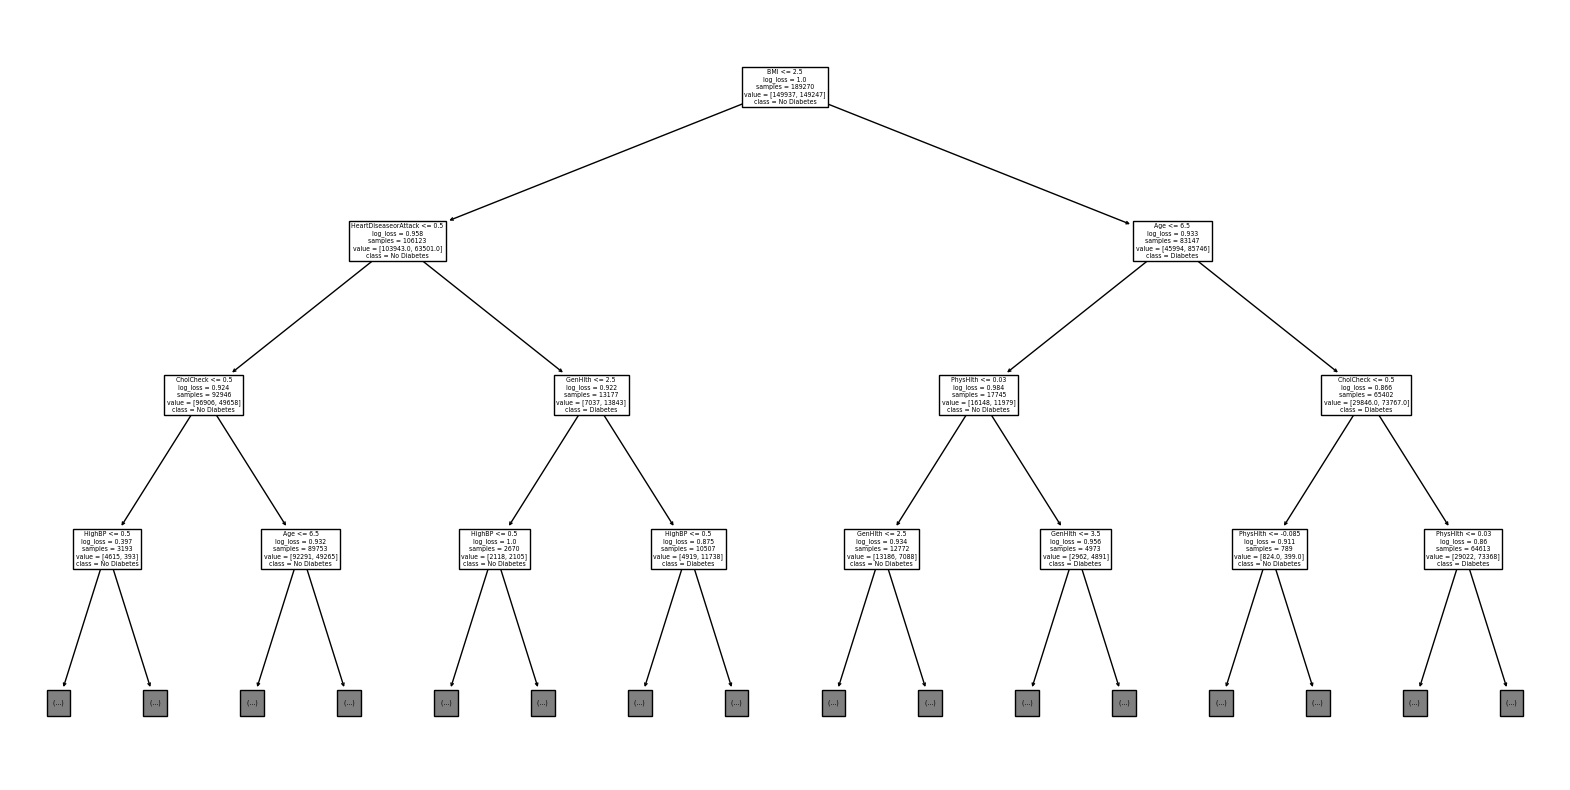

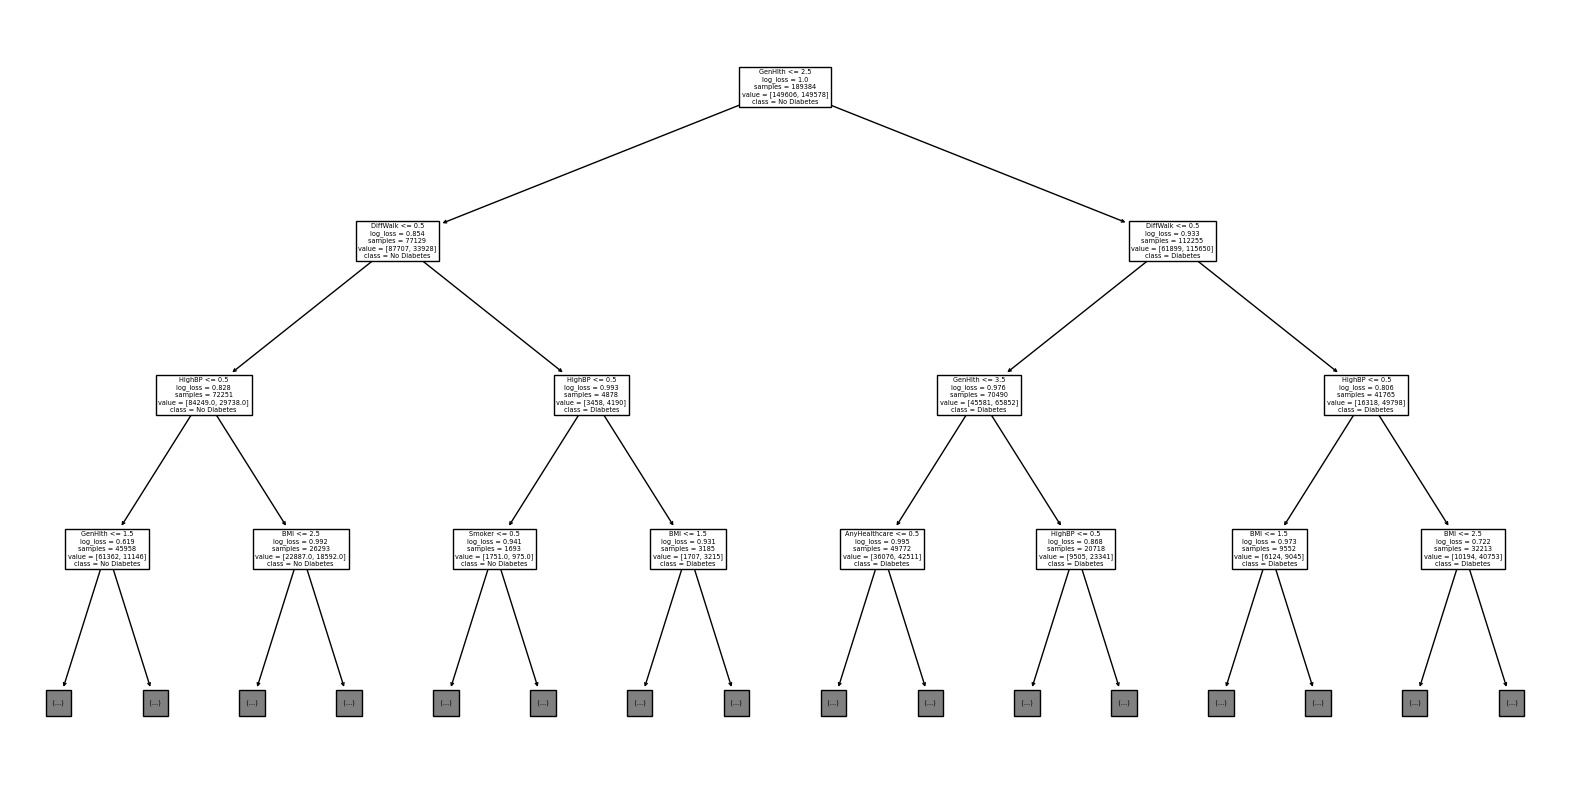

In [ ]:
# Access the saved model
rf_filename = "../../models/decision_trees_ensembles/brf_best_model_cv_sampling_pca20241129_232921.pkl"
rf = joblib.load(rf_filename)

# Make the necessary imports
import matplotlib.pyplot as plt
from sklearn import tree

# Access the decision tree model from the pipeline
random_forest_model = rf.named_steps['classifier']

# Access the first tree of the model
rf_first_tree = random_forest_model.estimators_[0]


# Visualize (the (first three layers of) the first tree of the model 
plt.figure(figsize=(20, 10))
tree.plot_tree(
    rf_first_tree,  
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3
)
plt.show()

# Access the second tree of the model
rf_second_tree = random_forest_model.estimators_[1]


# Visualize (the first three layers of) the second tree of the model 
plt.figure(figsize=(20, 10))
tree.plot_tree(
    rf_second_tree,  
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3
)
plt.show()

With respect to the first decision tree out of the random forest which is the result of the optimal hyperparameters selected by performing halving grid search, we can see that the most important feature is in this case is BMI, followed by 'HeartDiseaseorAttack' and 'Age'. Furthermore, also 'CholCheck', general health, physical health, and high blood pressure appear in the first three layers.
As part of the optimal hyperparameters random oversampling (without PCA) was chosen and, therefore, at least the first two layers contain the same features as the first decision tree out of the random forest on the random oversampled data. Meaning, the two most important features here are also, first, high blood pressure and, second, general health.
The optimal hyperparameters together with the metrics of that best decision tree model, such as the recall and F1 score on the positive class, can be found in the evaluation.ipynb notebook.



With respect to the second decision tree out of the random forest, we can see that the most important feature is in this case is general health, followed by difficulty walking. Furthermore, high blood pressure, BMI, smoker, and 'AnyHealthcare' appear in the first three layers.
As part of the optimal hyperparameters random oversampling was chosen and, therefore, at least the most important feature general health is the same features as the one in the first decision tree out of the random forest on the random oversampled data.
Please find the optimal hyperparameters together with the metrics of that best decision tree model, such as the recall and F1 score on the positive class, can be found in the evaluation.ipynb notebook.


However, overall, this is also the best classifier out of all the three tuned models (Decision Tree, Random Forest, Adaptive Boosting) with respect to the F1 score on the positive class.

## 2.3 Halving Grid Search for Adaptive Boosting Classifier (with Cross-Validation and PCA)

In [114]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
from tqdm import tqdm

pipeline = Pipeline(
    [
        ("resampler", None),  # Placeholder for resampling method
        ("pca", None),  # Placeholder for PCA
        ('classifier', None)  # Placeholder for classifier
    ]
)

param_grid = [
    # Source of Hyperparameters for Adaptive Boosting Classifier adjusted ranges with ChatGPT
    {
    'classifier': [AdaBoostClassifier()],
    'classifier__n_estimators': [10, 50, 100, 500], 
    'classifier__learning_rate': [0.001, 0.01, 0.1, 1, 10],  
    'classifier__algorithm': ['SAMME'],
    'classifier__random_state': [42],  
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [
        None, 
        PCA(n_components=5), 
        PCA(n_components=10), 
        PCA(n_components=None)
    ]  
    }
]


# Set up HalvingGridSearchCV
adab_halving_grid_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="f1",  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1,  # To track progress
)

# Fit the halving grid search on training data
adab_halving_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", adab_halving_grid_search.best_params_)
print("Best Cross-Validation F1 Score:", adab_halving_grid_search.best_score_)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 730
max_resources_: 177576
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 400
n_resources: 730
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
----------
iter: 1
n_candidates: 134
n_resources: 2190
Fitting 5 folds for each of 134 candidates, totalling 670 fits
----------
iter: 2
n_candidates: 45
n_resources: 6570
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 3
n_candidates: 15
n_resources: 19710
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 4
n_candidates: 5
n_resources: 59130
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'classifier': AdaBoostClassifier(), 'classifier__algorithm': 'SAMME', 'classifier__learning_rate': 1, 'classifier__n_estimators': 50, 'classifier__random_state': 42, 'pca': None, 'resampler': SMOTETomek(random_state=42)}
Best Cross-Validation F1 Score

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the best model from the halving grid search
adab_best_model = adab_halving_grid_search.best_estimator_

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/adab_best_model_cv_sampling_pca{timestamp}.pkl'
joblib.dump(adab_best_model, model_filename)

print(f"Best model saved to '{model_filename}'")

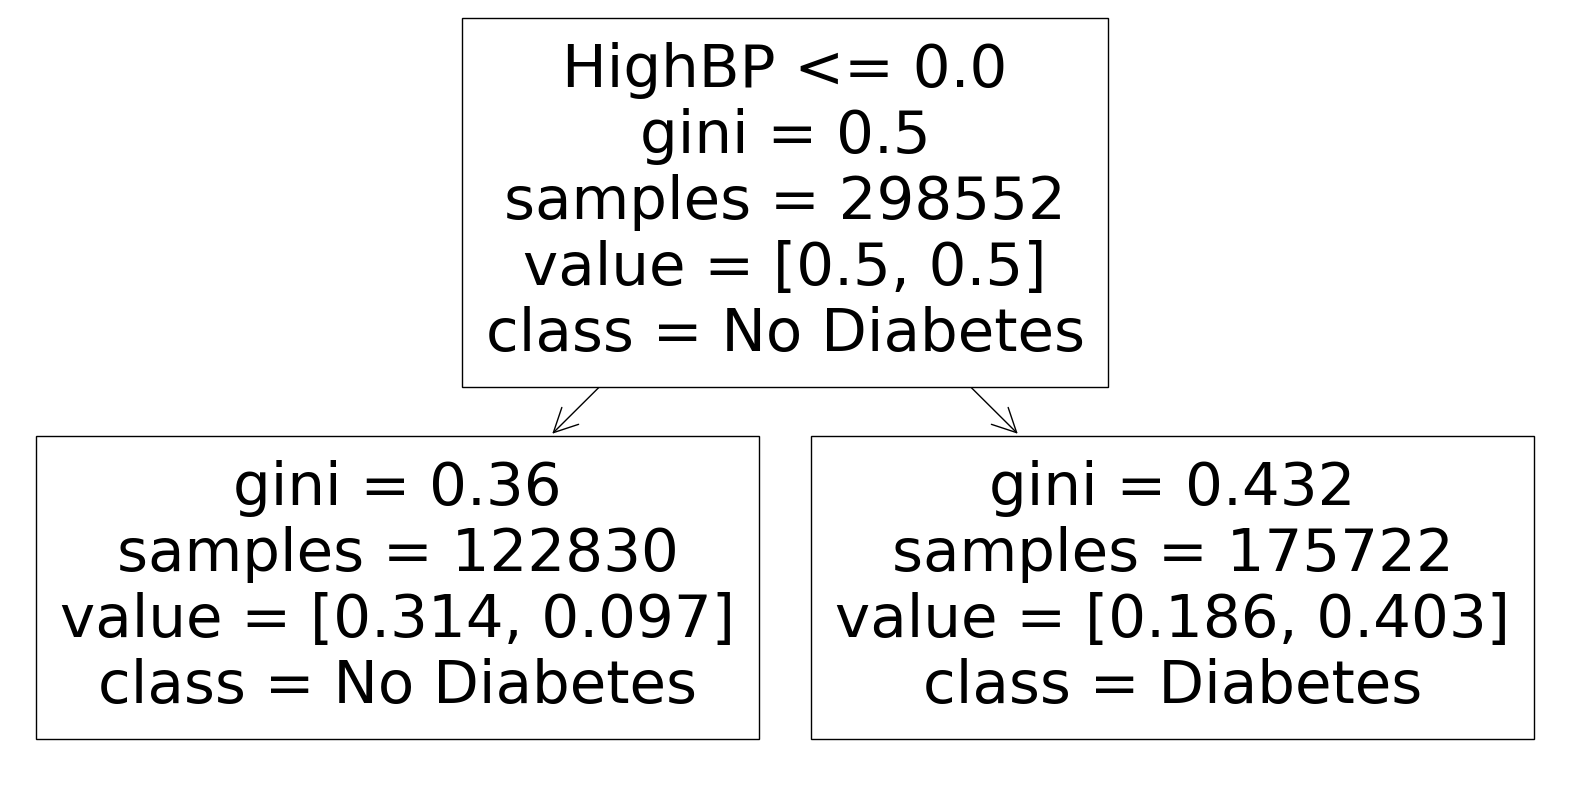

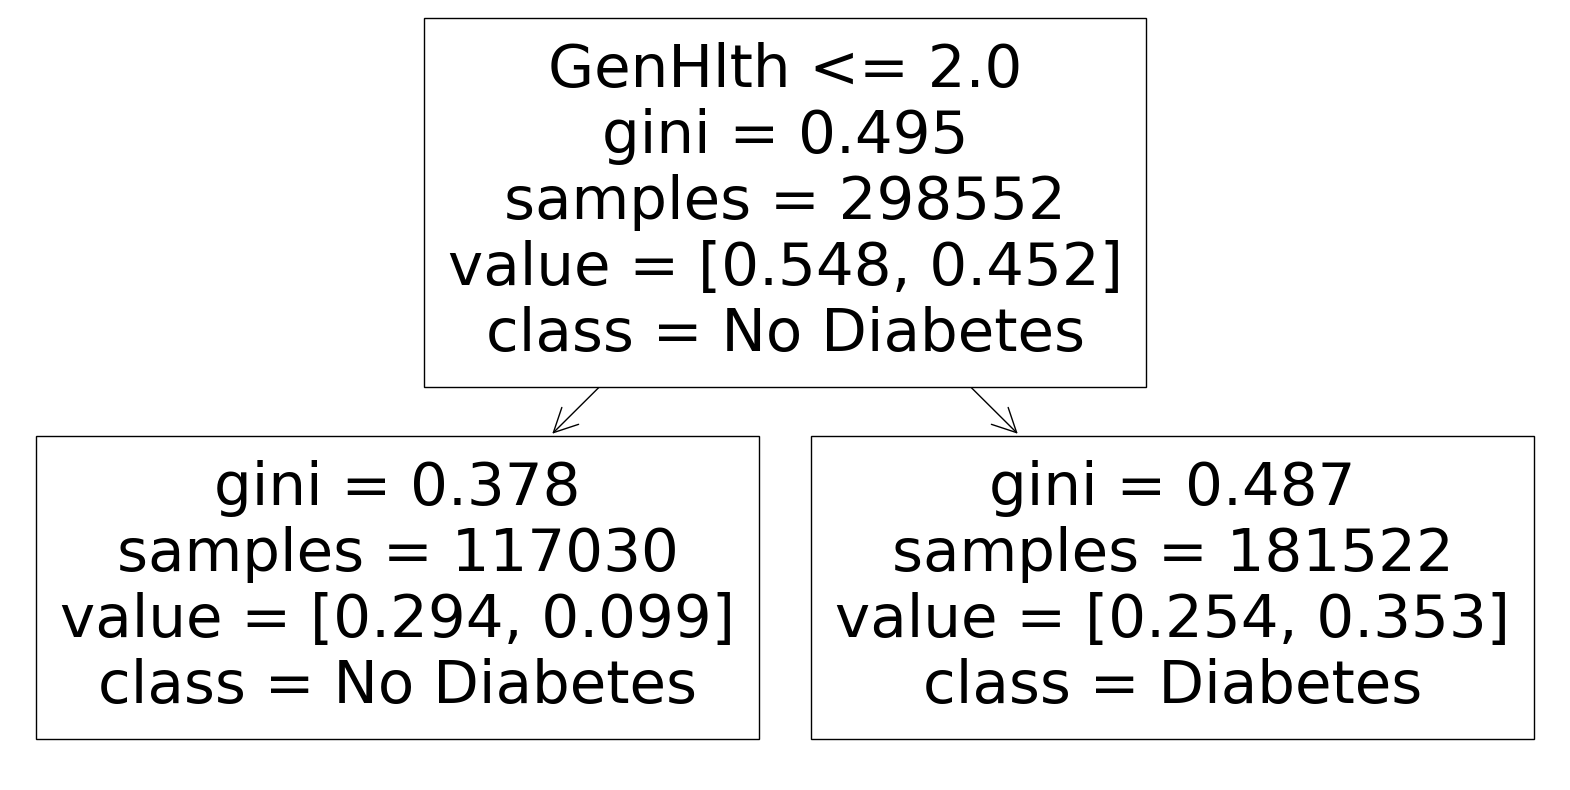

In [ ]:
# Access the saved model
adab_filename = "../../models/decision_trees_ensembles/adab_best_model_cv_sampling_pca20241130_184757.pkl"
adab = joblib.load(adab_filename)

# Make the necessary imports
import matplotlib.pyplot as plt
from sklearn import tree

# Access the decision tree model from the pipeline
ada_boost_model = adab.named_steps['classifier']

# Access the first tree of the model
adab_first_tree = ada_boost_model.estimators_[0]


# Visualize the first tree of the model 
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adab_first_tree,  
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

# Access the second tree of the model
adab_second_tree = ada_boost_model.estimators_[1]


# Visualize the second tree of the model 
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adab_second_tree,  
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

The feature appearing as the first decision stump out of the adaptive boosting model which is the result of the optimal hyperparameters selected by performing halving grid search is high blood pressure which was also the feature of the first decision stump with respect to the adaptive boosting model on the random oversampled data. This seems plausible due to the fact that as part of the optimal hyperparameters random oversampling (without PCA) was chosen.
The optimal hyperparameters together with the metrics of that best decision tree model, such as the recall and F1 score on the positive class, can be found in the evaluation.ipynb notebook.



The feature appearing as the second decision stump out of the adaptive boosting model which is the result of the optimal hyperparameters selected by performing halving grid search is general health which was also the feature of the second decision stump with respect to the adaptive boosting model on the random oversampled data. This seems reasonable because random oversamplinng (without PCA) was chosen as one of the optimal hyperparameters of this best model for adaptive boosting.
Once again, the optimal hyperparameters together with the metrics of that best decision tree model, such as the recall and F1 score on the positive class, can be found in the evaluation.ipynb notebook.

## [ EXCLUDED: 2.4 Halving Grid Search for Extreme Gradient Boosting Classifier (with Cross-Validation and PCA) ]

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
from tqdm import tqdm

pipeline = Pipeline(
    [
        ("resampler", None),  # Placeholder for resampling method
        ("pca", None),  # Placeholder for PCA
        ('classifier', None)  # Placeholder for classifier
    ]
)

param_grid = [
# Source of Hyperparameters for XGBoost & ChatGPT: https://medium.com/@amitsinghrajput_92567/understanding-hyperparameters-in-decision-trees-xgboost-and-lightgbm-7b64cfed77f0
    {
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [10, 50, 100, 500],  
        'classifier__max_depth': [1, 2, 5, 10, 50, 100, None], 
        'classifier__learning_rate': [0.001, 0.01, 0.1, 1, 10],  
        'classifier__min_child_weight': [1, 3, 5, 10, 50], 
        'classifier__gamma': [0, 0.1, 0.5, 1, 5, 10],
        'classifier__subsample': [0, 0.1, 0.3, 0.5, 0.7, 1],
        'classifier__colsample_bytree': [0, 0.1, 0.3, 0.5, 0.7, 1],
        'resampler': [
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [
        None, 
        PCA(n_components=5), 
        PCA(n_components=10), 
        PCA(n_components=None)
    ]  
    }
]


# Set up HalvingGridSearchCV
xgb_halving_grid_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="f1",  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1,  # To track progress
)

# Fit the halving grid search on training data
xgb_halving_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", xgb_halving_grid_search.best_params_)
print("Best Cross-Validation F1 Score:", xgb_halving_grid_search.best_score_)

Unfortunately, the above code was computationally not feasible to exectute which is why we did not take this ensemble model into futher consideration for our comparison of the best model out of the standard decision tree and ensemble models based on the F1 score of the positive class. 

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the best model from the halving grid search
xgb_best_model = xgb_halving_grid_search.best_estimator_

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/xgb_best_model_cv_sampling_pca{timestamp}.pkl'
joblib.dump(xgb_best_model, model_filename)

print(f"Best model saved to '{model_filename}'")

# [ EXCLUDED: 3. Halving Grid Search for All Classifiers (with Cross-Validation and PCA) ]

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

pipeline = Pipeline(
    [
        ("resampler", None),  # Placeholder for resampling method
        ("pca", None),  # Placeholder for PCA
        ('classifier', None)  # Placeholder for classifier
    ]
)

param_grid = [
# Source of Hyperparameters for Decision Tree & ChatGPT (ranges for large dataset):  https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e
    {
    'classifier': [DecisionTreeClassifier()],
    'classifier__max_depth': [1, 2, 5, 10, 50, 100, None], 
    'classifier__max_leaf_nodes': [1, 2, 5, 10, 50, 100, 500, None], 
    'classifier__max_features': ['auto', 'sqrt', 'log2', None],  
    'classifier__min_samples_split': [2, 5, 10, 50, 100], 
    'classifier__min_samples_leaf': [1, 2, 5, 10, 20, 50], 
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],  
    'classifier__splitter': ['best', 'random'],  
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [None, PCA(n_components=5), PCA(n_components=10), PCA(n_components=None)
    ]  # PCA options for dimensionality reduction.
},
    # Source of Hyperparameters for Random Forest Classifier adjusted ranges with ChatGPT
    {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [10, 50, 100, 500], 
    'classifier__max_depth': [1, 2, 5, 10, 50, 100, None], 
    'classifier__max_features': ['sqrt', 'log2', 0.5, 0.7, 1.0],  
    'classifier__min_samples_split': [2, 3, 5, 10, 50, 100], 
    'classifier__bootstrap': [True, False],  
    'classifier__criterion': ['gini', 'entropy', 'log_loss'], 
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [
        None, 
        PCA(n_components=5), 
        PCA(n_components=10), 
        PCA(n_components=None)
    ]  
    },
    # Source of Hyperparameters for Adaptive Boosting Classifier adjusted ranges with ChatGPT
    {
    'classifier': [AdaBoostClassifier()],
    'classifier__n_estimators': [10, 50, 100, 500], 
    'classifier__learning_rate': [0.001, 0.01, 0.1, 1, 10],  
    'classifier__algorithm': ['SAMME'],
    'classifier__random_state': [42],  
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [
        None, 
        PCA(n_components=5), 
        PCA(n_components=10), 
        PCA(n_components=None)
    ]  
    },
# Source of Hyperparameters for XGBoost & ChatGPT: https://medium.com/@amitsinghrajput_92567/understanding-hyperparameters-in-decision-trees-xgboost-and-lightgbm-7b64cfed77f0
    {
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [10, 50, 100, 500], 
        'classifier__max_depth': [1, 2, 5, 10, 50, 100, None], 
        'classifier__learning_rate': [0.001, 0.01, 0.1, 1, 10],  
        'classifier__min_child_weight': [1, 3, 5, 10, 50], 
        'classifier__gamma': [0, 0.1, 0.5, 1, 5, 10],
        'classifier__subsample': [0, 0.1, 0.3, 0.5, 0.7, 1],
        'classifier__colsample_bytree': [0, 0.1, 0.3, 0.5, 0.7, 1],
        'resampler': [
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [
        None, 
        PCA(n_components=5), 
        PCA(n_components=10), 
        PCA(n_components=None)
    ]  
    }
]


# Set up HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="f1",  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1,  # To track progress
)

# Fit the halving grid search on training data
halving_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Model w/ Best Parameters:", halving_grid_search.best_params_)
print("Best Cross-Validation F1 Score:", halving_grid_search.best_score_)

The above code was computationally not feasible to fully execute, as well. Therefore, we compared the above models with their optimal hyperparameters found by halving grid search based on the F1 score of the positive class with each other. 

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the best model from the halving grid search
best_model = halving_grid_search.best_estimator_

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best model to a file with a timestamp
model_filename = f'../../models/decision_trees_ensembles/dt_em_model_cv_sampling_pca{timestamp}.pkl'
joblib.dump(best_model, model_filename)

print(f"Best model saved to '{model_filename}'")